In [21]:
# Import used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.cluster import KMeans
import catboost as cb
from scipy import stats
from collections import OrderedDict

In [22]:
df_train = pd.read_csv('Dataset/train.csv')

In [23]:
df_train.head()

,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Get Data Summary**

In [24]:
display(df_train.drop(columns='ID').describe().T)

,count,mean,std,min,25%,50%,75%,max
y,5760.0,703.483854,655.249491,0.0,188.00,485.50,1066.000,3556.00
Hour,5760.0,11.500000,6.922788,0.0,5.75,11.50,17.250,23.00
Temperature(�C),5760.0,12.803559,11.902206,-15.1,3.20,13.70,22.225,39.40
Humidity(%),5760.0,58.361806,19.840167,0.0,43.00,57.00,73.000,98.00
Wind speed (m/s),5760.0,1.723333,1.047898,0.0,0.90,1.50,2.300,7.40
Visibility (10m),5760.0,1473.711458,585.879880,27.0,1025.75,1732.00,2000.000,2000.00
Dew point temperature(�C),5760.0,4.058264,13.003582,-26.9,-5.40,5.20,14.700,27.20
Solar Radiation (MJ/m2),5760.0,0.572325,0.869943,0.0,0.00,0.01,0.940,3.52
Rainfall(mm),5760.0,0.135122,1.075320,0.0,0.00,0.00,0.000,35.00
Snowfall (cm),5760.0,0.046302,0.323728,0.0,0.00,0.00,0.000,5.10


In [25]:
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

None

In [26]:
display(df_train.isna().sum())

ID                           0
Date                         0
y                            0
Hour                         0
Temperature(�C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(�C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [27]:
display(df_train.duplicated(subset=None, keep='first').sum())

0

## Data Exploration

**1- Boxplot of wather features**

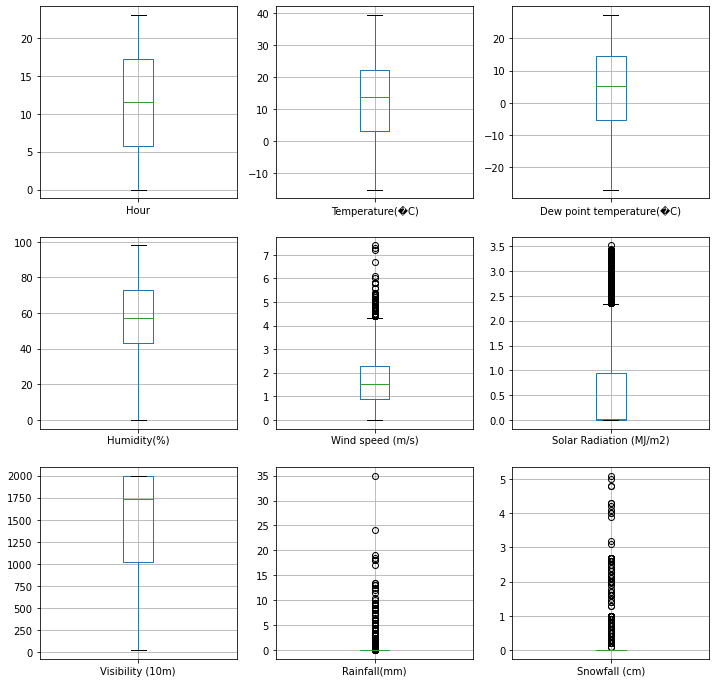

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(3, 3, 1)
_ = df_train.boxplot(column=['Hour'])

plt.subplot(3, 3,2)
_ = df_train.boxplot(column=['Temperature(�C)'])

plt.subplot(3, 3, 3)
_ = df_train.boxplot(column=['Dew point temperature(�C)'])

plt.subplot(3, 3,4)
_ = df_train.boxplot(column=['Humidity(%)'])

plt.subplot(3, 3, 5)
_ = df_train.boxplot(column=['Wind speed (m/s)'])

plt.subplot(3, 3,6)
_ = df_train.boxplot(column=['Solar Radiation (MJ/m2)'])

plt.subplot(3, 3,7)
_ = df_train.boxplot(column=['Visibility (10m)'])

plt.subplot(3, 3,8)
_ = df_train.boxplot(column=['Rainfall(mm)'])

plt.subplot(3, 3,9)
_ = df_train.boxplot(column=['Snowfall (cm)'])

**2- Distribution of numerical features**

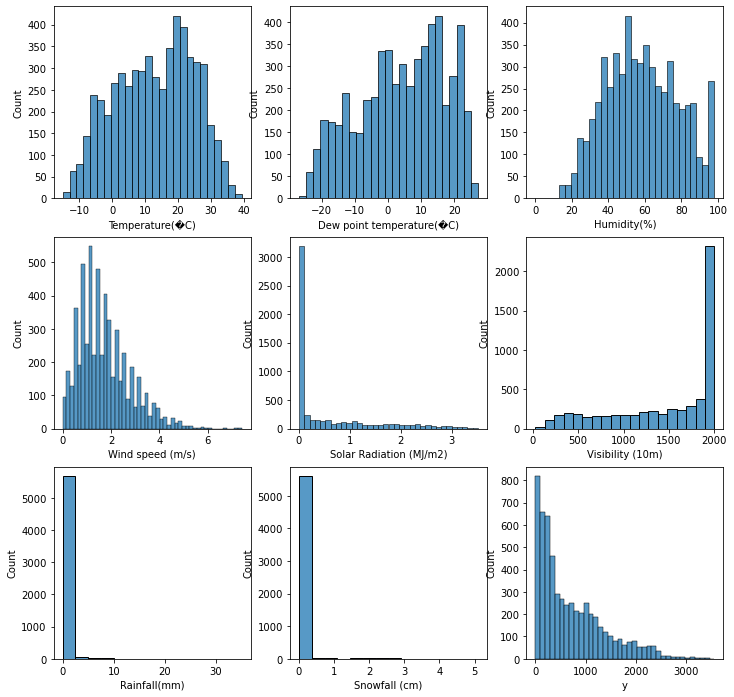

In [5]:
plt.figure(figsize=(12,12))
plt.subplot(3, 3, 1)
_ = sns.histplot(x='Temperature(�C)', data=df_train)

plt.subplot(3, 3, 2)
_ = sns.histplot(x='Dew point temperature(�C)', data=df_train)

plt.subplot(3, 3,3)
_ = sns.histplot(x='Humidity(%)', data=df_train)

plt.subplot(3, 3, 4)
_ = sns.histplot(x='Wind speed (m/s)', data=df_train)

plt.subplot(3, 3,5)
_ = sns.histplot(x='Solar Radiation (MJ/m2)', data=df_train)

plt.subplot(3, 3,6)
_ = sns.histplot(x='Visibility (10m)', data=df_train)

plt.subplot(3, 3,7)
_ = sns.histplot(x='Rainfall(mm)', data=df_train)

plt.subplot(3, 3,8)
_ = sns.histplot(x='Snowfall (cm)', data=df_train)

plt.subplot(3, 3,9)
_ = sns.histplot(x='y', data=df_train)

**3- Boxplot of Hour,Seasons, and Holiday features**

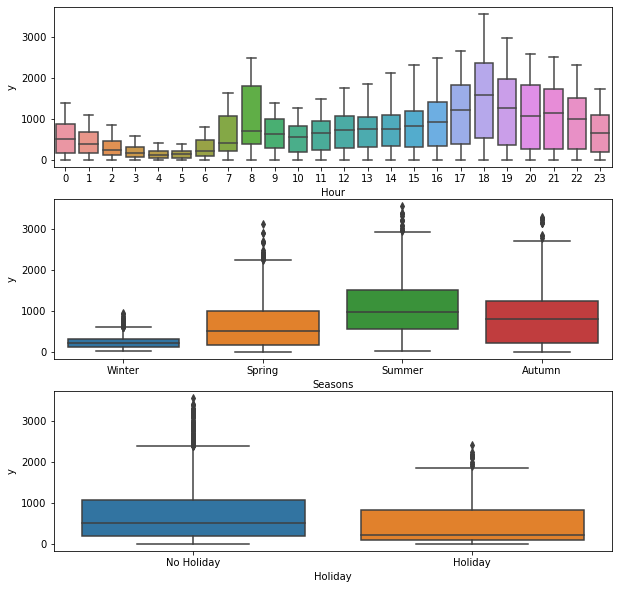

In [6]:
plt.figure(figsize=(10,10))

plt.subplot(3, 1, 1)
_ = sns.boxplot(x= 'Hour', y='y', data=df_train)

plt.subplot(3, 1, 2)
_ = sns.boxplot(x= 'Seasons', y='y', data=df_train)

plt.subplot(3, 1, 3)
_ = sns.boxplot(x= 'Holiday', y='y', data=df_train)

**Creating some additional features from the date/time variable**

In [7]:
df_train_copy=df_train.copy()

In [8]:
#Convert Date column type to datetime
df_train_copy['Date']=pd.to_datetime(df_train_copy['Date'],format='%d/%m/%Y')
# Add Day column
df_train_copy['dayOfWeek'] = df_train_copy['Date'].dt.day_name()
# Add month column
df_train_copy['month'] = df_train_copy['Date'].dt.month_name()
# Add year column
df_train_copy['year'] = pd.DatetimeIndex(df_train_copy['Date']).year
# Add year column
df_train_copy['woy'] = df_train_copy['Date'].apply(lambda x:x.weekofyear)

**4- Boxplot of date/time variables**

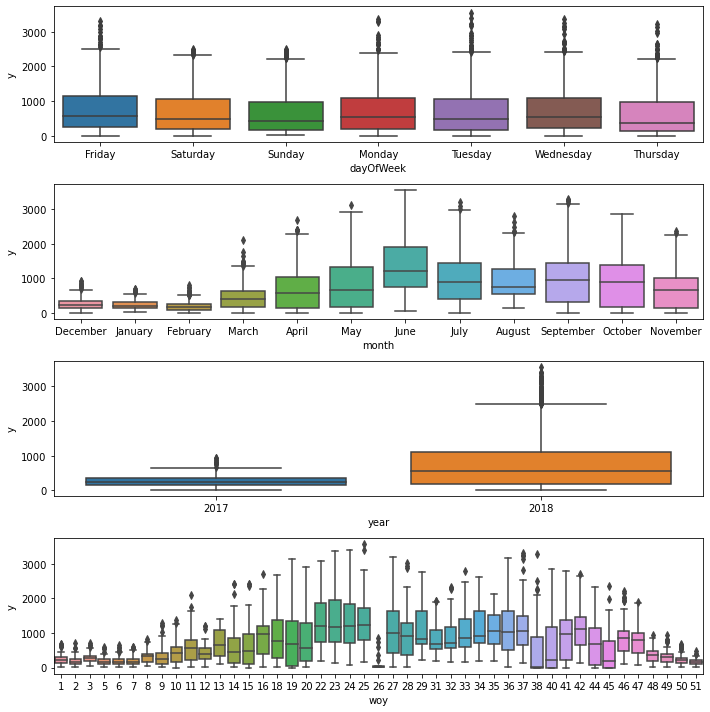

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(4, 1, 1)
_ = sns.boxplot(x= 'dayOfWeek', y='y', data=df_train_copy)

plt.subplot(4, 1, 2)
_ = sns.boxplot(x= 'month', y='y', data=df_train_copy)

plt.subplot(4, 1, 3)
_ = sns.boxplot(x= 'year', y='y', data=df_train_copy)

plt.subplot(4, 1, 4)
_ = sns.boxplot(x= 'woy', y='y', data=df_train_copy)

plt.tight_layout()

**5- Visualizing the sum of rental count per each day, month, Hour sorted**

In [10]:
dfVizHour=pd.DataFrame(df_train_copy.groupby('Hour').sum()['y'].sort_values(ascending=False))
display(dfVizHour.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True)))

dfVizdow=pd.DataFrame(df_train_copy.groupby('dayOfWeek').sum()['y'].sort_values(ascending=False))
display(dfVizdow.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True)))

dfVizMonth=pd.DataFrame(df_train_copy.groupby('month').sum()['y'].sort_values(ascending=False))
display(dfVizMonth.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True)))

dfVizSeasons=pd.DataFrame(df_train_copy.groupby('Seasons').sum()['y'].sort_values(ascending=False))
display(dfVizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True)))

,y
Hour,
18,362133
19,287781
17,274895
20,257818
21,248275
8,240061
16,223279
22,220926
15,198943


,y
dayOfWeek,
Friday,646191
Monday,612065
Tuesday,594777
Wednesday,592134
Saturday,556266
Sunday,538443
Thursday,512191


,y
month,
June,629130
July,489319
September,478025
August,444967
October,419809
May,402052
April,318283
November,316796
March,219941


,y
Seasons,
Summer,1563416
Autumn,1214630
Spring,940276
Winter,333745


**Pearson Linear Correlation Matrix**

<AxesSubplot:>

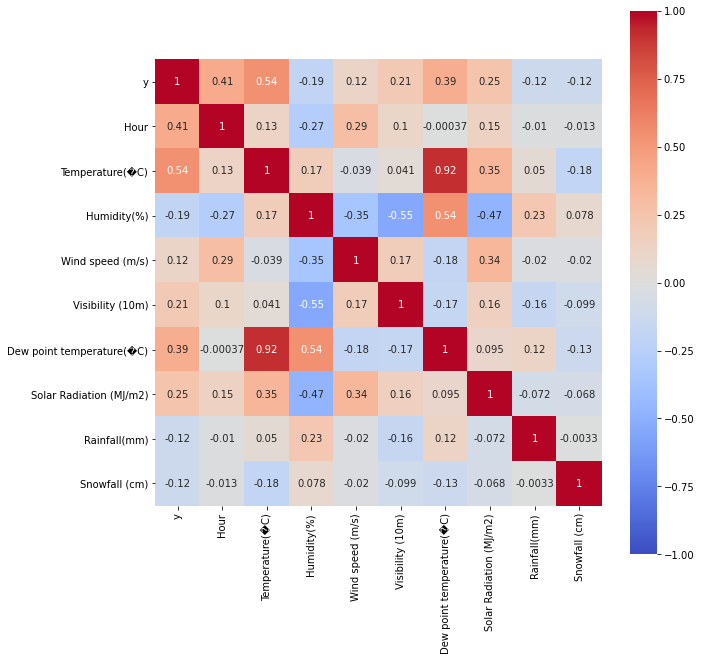

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.drop(columns=['ID']).corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

# Data Preprocessing function

In [12]:
def DataPrep(df):
    # Rename features with unknown characters 
    df.rename(columns={"Temperature(�C)": "Temperature(C)", 
                       "Dew point temperature(�C)": "Dew point temperature(C)"}, inplace=True)

    # Convert Date column type to datetime
    df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')
    
                                      ######### Feature Engineering #########
    # Add Day column
    df['dayOfWeek'] = df['Date'].dt.day_name()
    # Add month column
    df['month'] = df['Date'].dt.month_name()
    # Add year column
    df['year'] = pd.DatetimeIndex(df['Date']).year
    # Add week of year column
    df['woy'] = df['Date'].apply(lambda x:x.weekofyear)
    
    # Add RentDemand feature depending on the demand hours of rental
    df['RentDemand'] = np.where(((df.Hour >= 7)&(df.Hour <= 9)&(df['Functioning Day']==1))|
                                ((df.Hour >= 17)&(df.Hour <= 20)&(df['Functioning Day']==1)), 1, 0) # 1 high, 0 low
    
    # Add DayCycle ('night','morning','afternoon' & 'evening') column
    conditions = [((df.Hour >= 0)&(df.Hour <= 5)), ((df.Hour > 5)&(df.Hour <= 12)), 
                  ((df.Hour > 12)&(df.Hour <= 18))]
    choices = [0,1,2]
    df['DayCycle'] = np.select(conditions, choices, default= 3)
    
    # Grouping Rainfall(mm), Snowfall (cm) into 3 categories
    cond = [(df['Rainfall(mm)'] == 0),((df['Rainfall(mm)'] > 0)&(df['Rainfall(mm)'] <= 5))]
    choice = [0,1]
    df['rainfallDegree'] = np.select(cond, choice, default=2)

    cond2 = [(df['Snowfall (cm)'] == 0),((df['Snowfall (cm)'] > 0)&(df['Snowfall (cm)'] <= 1.2))]
    choice2 = [0,1]
    df['snowfallDegree'] = np.select(cond2, choice2, default= 2)
    
    # Encode dow, month, seasons features by their natural order for the next transformation only , then drop them
    mapping_dictDay={'Saturday':6,'Sunday':7,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5}
    df['dow_label']= df['dayOfWeek'].map(mapping_dictDay)
    mapping_dictmonth={'January':1,'February':2,'March':3,'April':4,'May':5,'June':6, 'July':7,'August':8,'September':9,
                       'October':10,'November':11, 'December':12}
    df['month_label']= df['month'].map(mapping_dictmonth)
    mapping_dictseason={'Winter':1,'Spring':2,'Summer':3,'Autumn':4}
    df['Seasons_label']= df['Seasons'].map(mapping_dictseason)
    # As hour, month, seasons, dow are Cyclic features such hr23 and 0 are close, 
    # we encode those features by getting their sin and cos components
    df['hr_sin_cos'] = np.sin(df.Hour*(2.*np.pi/24)) * np.cos(df.Hour*(2.*np.pi/24))
    df['month_sin_cos'] = np.sin(df.month_label*(2.*np.pi/12)) * np.cos(df.month_label*(2.*np.pi/12))
    df['dow_sin_cos'] = np.sin(df.dow_label*(2.*np.pi/7)) * np.cos(df.dow_label*(2.*np.pi/7))
    df['season_sin_cos'] = np.sin(df.Seasons_label*(2.*np.pi/4)) * np.cos(df.Seasons_label*(2.*np.pi/4))
    df = df.drop(columns=['dow_label', 'month_label', 'Seasons_label'])
    
    # Adding interactive features
    df['Hour_func'] = df['Hour']*df['Functioning Day']
    df['month_demand'] = df['month']*df['RentDemand']
    
    # Add column of total solar radiation per day
    solar_per_day = df.groupby('Date').aggregate({"Solar Radiation (MJ/m2)":np.mean})
    df['solar_per_day'] = df['Date'].map(solar_per_day['Solar Radiation (MJ/m2)'])
    
    # Adding column to identify days where there is no rain and snow and days of any
    df.loc[(df['Rainfall(mm)'] == 0) & (df['Snowfall (cm)'] == 0) , "snow&rain"]=1
    df.loc[(df['Rainfall(mm)'] != 0) | (df['Snowfall (cm)'] != 0) , "snow&rain"]=0
    
    # KMeans Clustering temp, dew cols 
    kmeans = KMeans(n_clusters=4, random_state=0,n_init=30, max_iter=10000)
    df['temp_dew_clusters']= kmeans.fit_predict(df[['Temperature(C)','Dew point temperature(C)']].values)
    
                             ######### Categorical features encoding #########
    # Binary encode features with two categries
    df['Functioning Day'] = np.where(df['Functioning Day'] == 'Yes', 1, 0) # 1 Yes, 0 No
    df['Holiday'] = np.where(df.Holiday == 'No Holiday', 1, 0) # 1 No Holiday, 0 Holiday
    
    # Target based Encoding for dow, month, seasons and hour columns
    mapping_dictDay={'Saturday':2,'Sunday':1,'Monday':4,'Tuesday':3,'Wednesday':3,'Thursday':0,'Friday':5}
    df['dayOfWeek']= df['dayOfWeek'].map(mapping_dictDay)

    mapping_dictmonth={'January':1,'February':0,'March':3,'April':4,'May':5,'June':7, 'July':6,'August':5,'September':6,
                           'October':5,'November':4, 'December':2}
    df['month']= df['month'].map(mapping_dictmonth)
    mapping_dictseason={'Winter':0,'Spring':1,'Summer':3,'Autumn':2}
    df['Seasons']= df['Seasons'].map(mapping_dictseason)

    mapping_dicthour={4:0, 5:0, 3:1, 6:2, 2:2, 1:3, 10:4, 0:4, 11:5, 7:5, 9:6, 23:6,
                      12:7, 13:7, 14:7, 15:8, 22:9, 16:9, 8:10, 21:10, 20:10, 17:11, 19:11, 18:12}
    df['Hour_intensity']= df['Hour'].map(mapping_dicthour)
    
                                     ######### Feature Scaling #########
    # Min-Max scaling skewed cols (Snowfall (cm), Rainfall(mm))
    columns=['Snowfall (cm)','Rainfall(mm)']
    x = df[columns].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df[columns] = pd.DataFrame(x_scaled)
    
    # Scale wind, hum, Solar features by log transformation
    df['Wind speed (m/s)']=np.log1p(df['Wind speed (m/s)'])
    df['Solar Radiation (MJ/m2)']=np.log1p(df['Solar Radiation (MJ/m2)'])
    df['Humidity(%)']=np.log1p(df['Humidity(%)'])
    
    # Scale Visibility by Reciprocal transformation
    df["Visibility (10m)"] =  1 / (df["Visibility (10m)"])
    
                                  ######### Feature Engineering #########
    # Clustering the data by K-means Algorithm
    kmeans = KMeans(n_clusters= 10, random_state=0,n_init=30, max_iter=10000)
    if 'y' in df.columns :
        df['data_clusters']= kmeans.fit_predict(df.drop(columns=['ID','Date','y']).values)
    else:
        df['data_clusters']= kmeans.fit_predict(df.drop(columns=['ID','Date']).values)
    return df

In [13]:
# Perform previous preprocessing technique on the training data
df_train_prep = DataPrep(df_train) 

**Removing Rainfall(mm) outliers**

In [14]:
df_train_prep = df_train_prep[df_train_prep['Rainfall(mm)'] <= 0.6]

**Adding Average Rent per hour and day to training data and log-transform their values**

In [15]:
avg_rent_per_hour = df_train_prep.groupby('Hour').aggregate({"y":np.median}).round(0).astype(int)
df_train_prep['avg_rent_per_hour'] = df_train_prep['Hour'].map(avg_rent_per_hour['y'])
df_train_prep['avg_rent_per_hour']=np.log1p(df_train_prep['avg_rent_per_hour'])

avg_rent_per_day = df_train_prep.groupby('dayOfWeek').aggregate({"y":np.median}).round(0).astype(int)
df_train_prep['avg_rent_per_day'] = df_train_prep['dayOfWeek'].map(avg_rent_per_day['y'])
df_train_prep['avg_rent_per_day']=np.log1p(df_train_prep['avg_rent_per_day'])

# Train Validation split

In [17]:
train_df, val_df = train_test_split(df_train_prep, test_size=0.01, random_state=42)

X_train = train_df.drop(columns=['ID', 'y','Date'])
y_train = np.log1p(train_df['y'])

X_val = val_df.drop(columns=['ID', 'y','Date'])
y_val = np.log1p(val_df['y'])

In [16]:
df_train_prep = df_train_prep.drop(columns = ['Snowfall (cm)','Hour','Dew point temperature(C)'])

# Train the Models

**Train XGBoost model**

In [18]:
model_xgb = XGBRegressor(colsample_bytree=0.3,
                 gamma=0,             
                 learning_rate=0.02, eval_metric ='mae',
                 max_depth=2,
                 min_child_weight=2,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.9,
                 reg_lambda=0.2,
                 subsample=0.5,
                 seed=42) 

model_xgb.fit(X_train, y_train)
y_pred_xgb = np.expm1(model_xgb.predict(X_val)).round(0).astype(int)
y_val= np.expm1(y_val).round(0).astype(int)

for i in range(len(y_pred_xgb)):
    if y_pred_xgb[i] < 0:
        y_pred_xgb[i] = 0

print("Metrics of XGB model:")
print("Val RMSLE XGB model =", np.sqrt(mean_squared_log_error(y_val, y_pred_xgb)))
print('Val Root Mean Squared Error XGB model:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_xgb)))
print('Val R2 Score XGB model:',  r2_score(y_val, y_pred_xgb))

Metrics of XGB model:
Val RMSLE XGB model = 0.18441171322264424
Val Root Mean Squared Error XGB model: 130.20527559628084
Val R2 Score XGB model: 0.9585330249572492


In [19]:
OrderedDict(sorted(model_xgb.get_booster().get_fscore().items(), key=lambda t: t[1], reverse=True))

OrderedDict([('solar_per_day', 3076),
             ('Visibility (10m)', 2952),
             ('Humidity(%)', 2737),
             ('Temperature(C)', 2197),
             ('Rainfall(mm)', 2186),
             ('woy', 1564),
             ('Hour_func', 1537),
             ('Wind speed (m/s)', 1376),
             ('dayOfWeek', 1105),
             ('avg_rent_per_hour', 1093),
             ('Solar Radiation (MJ/m2)', 965),
             ('Hour_intensity', 916),
             ('dow_sin_cos', 891),
             ('hr_sin_cos', 812),
             ('avg_rent_per_day', 802),
             ('data_clusters', 756),
             ('month_demand', 640),
             ('rainfallDegree', 582),
             ('Functioning Day', 531),
             ('month', 506),
             ('DayCycle', 430),
             ('month_sin_cos', 420),
             ('snow&rain', 341),
             ('Seasons', 304),
             ('Holiday', 295),
             ('temp_dew_clusters', 286),
             ('RentDemand', 274),
             ('sea

**Train CatBoost model**

0:	learn: 1.0938158	total: 149ms	remaining: 37m 16s
1:	learn: 1.0336782	total: 154ms	remaining: 19m 11s
2:	learn: 0.9576702	total: 158ms	remaining: 13m 8s
3:	learn: 0.9121559	total: 161ms	remaining: 10m 5s
4:	learn: 0.8685110	total: 165ms	remaining: 8m 13s
5:	learn: 0.8313546	total: 167ms	remaining: 6m 58s
6:	learn: 0.7778457	total: 170ms	remaining: 6m 4s
7:	learn: 0.7501516	total: 172ms	remaining: 5m 22s
8:	learn: 0.7266705	total: 175ms	remaining: 4m 51s
9:	learn: 0.6868031	total: 177ms	remaining: 4m 25s
10:	learn: 0.6525132	total: 179ms	remaining: 4m 4s
11:	learn: 0.6326739	total: 182ms	remaining: 3m 46s
12:	learn: 0.5999611	total: 184ms	remaining: 3m 31s
13:	learn: 0.5715689	total: 186ms	remaining: 3m 18s
14:	learn: 0.5464780	total: 188ms	remaining: 3m 7s
15:	learn: 0.5343491	total: 190ms	remaining: 2m 57s
16:	learn: 0.5120939	total: 192ms	remaining: 2m 49s
17:	learn: 0.5030510	total: 194ms	remaining: 2m 41s
18:	learn: 0.4855751	total: 196ms	remaining: 2m 34s
19:	learn: 0.4689334	to

210:	learn: 0.1928201	total: 673ms	remaining: 47.2s
211:	learn: 0.1924000	total: 676ms	remaining: 47.1s
212:	learn: 0.1922663	total: 678ms	remaining: 47.1s
213:	learn: 0.1920940	total: 681ms	remaining: 47s
214:	learn: 0.1919072	total: 683ms	remaining: 47s
215:	learn: 0.1915947	total: 686ms	remaining: 46.9s
216:	learn: 0.1906048	total: 689ms	remaining: 46.9s
217:	learn: 0.1904120	total: 692ms	remaining: 46.9s
218:	learn: 0.1902460	total: 694ms	remaining: 46.8s
219:	learn: 0.1901651	total: 697ms	remaining: 46.8s
220:	learn: 0.1894475	total: 700ms	remaining: 46.8s
221:	learn: 0.1892677	total: 703ms	remaining: 46.8s
222:	learn: 0.1887082	total: 706ms	remaining: 46.8s
223:	learn: 0.1882749	total: 708ms	remaining: 46.7s
224:	learn: 0.1881291	total: 711ms	remaining: 46.7s
225:	learn: 0.1879052	total: 713ms	remaining: 46.6s
226:	learn: 0.1877915	total: 715ms	remaining: 46.6s
227:	learn: 0.1876016	total: 718ms	remaining: 46.5s
228:	learn: 0.1874767	total: 720ms	remaining: 46.5s
229:	learn: 0.18

397:	learn: 0.1589285	total: 1.19s	remaining: 43.7s
398:	learn: 0.1588435	total: 1.2s	remaining: 43.7s
399:	learn: 0.1588096	total: 1.2s	remaining: 43.7s
400:	learn: 0.1586377	total: 1.2s	remaining: 43.7s
401:	learn: 0.1584894	total: 1.2s	remaining: 43.7s
402:	learn: 0.1583544	total: 1.21s	remaining: 43.7s
403:	learn: 0.1582962	total: 1.21s	remaining: 43.7s
404:	learn: 0.1578829	total: 1.21s	remaining: 43.7s
405:	learn: 0.1578100	total: 1.21s	remaining: 43.7s
406:	learn: 0.1576770	total: 1.22s	remaining: 43.7s
407:	learn: 0.1576165	total: 1.22s	remaining: 43.6s
408:	learn: 0.1575750	total: 1.22s	remaining: 43.6s
409:	learn: 0.1575291	total: 1.22s	remaining: 43.6s
410:	learn: 0.1574528	total: 1.23s	remaining: 43.6s
411:	learn: 0.1574286	total: 1.23s	remaining: 43.5s
412:	learn: 0.1573458	total: 1.23s	remaining: 43.5s
413:	learn: 0.1572920	total: 1.24s	remaining: 43.5s
414:	learn: 0.1571354	total: 1.24s	remaining: 43.5s
415:	learn: 0.1568871	total: 1.24s	remaining: 43.5s
416:	learn: 0.15

589:	learn: 0.1409695	total: 1.71s	remaining: 41.9s
590:	learn: 0.1409229	total: 1.72s	remaining: 41.9s
591:	learn: 0.1409023	total: 1.72s	remaining: 41.9s
592:	learn: 0.1408587	total: 1.72s	remaining: 41.8s
593:	learn: 0.1408339	total: 1.73s	remaining: 41.8s
594:	learn: 0.1408051	total: 1.73s	remaining: 41.8s
595:	learn: 0.1407378	total: 1.73s	remaining: 41.8s
596:	learn: 0.1407168	total: 1.73s	remaining: 41.8s
597:	learn: 0.1406919	total: 1.74s	remaining: 41.8s
598:	learn: 0.1406249	total: 1.74s	remaining: 41.9s
599:	learn: 0.1405862	total: 1.74s	remaining: 41.9s
600:	learn: 0.1405677	total: 1.75s	remaining: 41.8s
601:	learn: 0.1405250	total: 1.75s	remaining: 41.8s
602:	learn: 0.1405051	total: 1.75s	remaining: 41.8s
603:	learn: 0.1404746	total: 1.75s	remaining: 41.8s
604:	learn: 0.1404439	total: 1.76s	remaining: 41.8s
605:	learn: 0.1403996	total: 1.76s	remaining: 41.8s
606:	learn: 0.1402774	total: 1.76s	remaining: 41.8s
607:	learn: 0.1401027	total: 1.77s	remaining: 41.8s
608:	learn: 

763:	learn: 0.1316579	total: 2.24s	remaining: 41.7s
764:	learn: 0.1315722	total: 2.24s	remaining: 41.7s
765:	learn: 0.1314703	total: 2.24s	remaining: 41.7s
766:	learn: 0.1314452	total: 2.25s	remaining: 41.7s
767:	learn: 0.1313534	total: 2.25s	remaining: 41.7s
768:	learn: 0.1313197	total: 2.25s	remaining: 41.7s
769:	learn: 0.1311281	total: 2.26s	remaining: 41.7s
770:	learn: 0.1311031	total: 2.26s	remaining: 41.8s
771:	learn: 0.1309744	total: 2.27s	remaining: 41.8s
772:	learn: 0.1309508	total: 2.27s	remaining: 41.8s
773:	learn: 0.1308789	total: 2.27s	remaining: 41.8s
774:	learn: 0.1308296	total: 2.28s	remaining: 41.8s
775:	learn: 0.1307445	total: 2.28s	remaining: 41.8s
776:	learn: 0.1307031	total: 2.28s	remaining: 41.8s
777:	learn: 0.1306829	total: 2.29s	remaining: 41.8s
778:	learn: 0.1306475	total: 2.29s	remaining: 41.8s
779:	learn: 0.1306285	total: 2.29s	remaining: 41.8s
780:	learn: 0.1306197	total: 2.3s	remaining: 41.8s
781:	learn: 0.1306133	total: 2.3s	remaining: 41.8s
782:	learn: 0.

937:	learn: 0.1249368	total: 2.92s	remaining: 43.8s
938:	learn: 0.1249145	total: 2.92s	remaining: 43.8s
939:	learn: 0.1248250	total: 2.93s	remaining: 43.9s
940:	learn: 0.1248109	total: 2.94s	remaining: 43.9s
941:	learn: 0.1247541	total: 2.95s	remaining: 44s
942:	learn: 0.1247133	total: 2.95s	remaining: 44s
943:	learn: 0.1247035	total: 2.96s	remaining: 44s
944:	learn: 0.1246709	total: 2.96s	remaining: 44.1s
945:	learn: 0.1246173	total: 2.97s	remaining: 44.1s
946:	learn: 0.1245912	total: 2.97s	remaining: 44.1s
947:	learn: 0.1245242	total: 2.98s	remaining: 44.2s
948:	learn: 0.1245072	total: 2.98s	remaining: 44.2s
949:	learn: 0.1244539	total: 2.99s	remaining: 44.2s
950:	learn: 0.1244416	total: 2.99s	remaining: 44.2s
951:	learn: 0.1243127	total: 2.99s	remaining: 44.2s
952:	learn: 0.1242876	total: 3s	remaining: 44.2s
953:	learn: 0.1242714	total: 3s	remaining: 44.2s
954:	learn: 0.1242662	total: 3.01s	remaining: 44.2s
955:	learn: 0.1241547	total: 3.01s	remaining: 44.2s
956:	learn: 0.1241462	to

1132:	learn: 0.1185529	total: 3.6s	remaining: 44.1s
1133:	learn: 0.1185426	total: 3.61s	remaining: 44.1s
1134:	learn: 0.1185341	total: 3.61s	remaining: 44.1s
1135:	learn: 0.1185111	total: 3.62s	remaining: 44.1s
1136:	learn: 0.1184748	total: 3.62s	remaining: 44.1s
1137:	learn: 0.1184671	total: 3.62s	remaining: 44.1s
1138:	learn: 0.1184195	total: 3.63s	remaining: 44.1s
1139:	learn: 0.1183091	total: 3.63s	remaining: 44.1s
1140:	learn: 0.1182735	total: 3.63s	remaining: 44.1s
1141:	learn: 0.1182484	total: 3.64s	remaining: 44.1s
1142:	learn: 0.1182047	total: 3.64s	remaining: 44.2s
1143:	learn: 0.1181912	total: 3.65s	remaining: 44.2s
1144:	learn: 0.1181829	total: 3.65s	remaining: 44.2s
1145:	learn: 0.1181722	total: 3.65s	remaining: 44.1s
1146:	learn: 0.1181676	total: 3.65s	remaining: 44.1s
1147:	learn: 0.1181606	total: 3.66s	remaining: 44.1s
1148:	learn: 0.1181535	total: 3.66s	remaining: 44.1s
1149:	learn: 0.1181056	total: 3.66s	remaining: 44.1s
1150:	learn: 0.1180823	total: 3.67s	remaining: 

1323:	learn: 0.1138416	total: 4.29s	remaining: 44.3s
1324:	learn: 0.1138402	total: 4.29s	remaining: 44.3s
1325:	learn: 0.1138359	total: 4.3s	remaining: 44.3s
1326:	learn: 0.1138107	total: 4.3s	remaining: 44.3s
1327:	learn: 0.1137960	total: 4.3s	remaining: 44.3s
1328:	learn: 0.1137614	total: 4.31s	remaining: 44.3s
1329:	learn: 0.1137208	total: 4.31s	remaining: 44.3s
1330:	learn: 0.1137083	total: 4.31s	remaining: 44.3s
1331:	learn: 0.1136949	total: 4.32s	remaining: 44.3s
1332:	learn: 0.1136776	total: 4.32s	remaining: 44.3s
1333:	learn: 0.1136556	total: 4.33s	remaining: 44.3s
1334:	learn: 0.1136368	total: 4.33s	remaining: 44.3s
1335:	learn: 0.1136241	total: 4.33s	remaining: 44.3s
1336:	learn: 0.1136143	total: 4.34s	remaining: 44.3s
1337:	learn: 0.1136097	total: 4.34s	remaining: 44.3s
1338:	learn: 0.1136081	total: 4.34s	remaining: 44.3s
1339:	learn: 0.1134663	total: 4.35s	remaining: 44.3s
1340:	learn: 0.1134400	total: 4.35s	remaining: 44.3s
1341:	learn: 0.1134313	total: 4.36s	remaining: 44

1498:	learn: 0.1099123	total: 4.97s	remaining: 44.8s
1499:	learn: 0.1098935	total: 4.97s	remaining: 44.8s
1500:	learn: 0.1098709	total: 4.98s	remaining: 44.8s
1501:	learn: 0.1097489	total: 4.98s	remaining: 44.8s
1502:	learn: 0.1097403	total: 4.99s	remaining: 44.8s
1503:	learn: 0.1096879	total: 4.99s	remaining: 44.8s
1504:	learn: 0.1096693	total: 5s	remaining: 44.8s
1505:	learn: 0.1096431	total: 5s	remaining: 44.8s
1506:	learn: 0.1095474	total: 5s	remaining: 44.8s
1507:	learn: 0.1095354	total: 5.01s	remaining: 44.8s
1508:	learn: 0.1095086	total: 5.02s	remaining: 44.9s
1509:	learn: 0.1094785	total: 5.02s	remaining: 44.9s
1510:	learn: 0.1094674	total: 5.03s	remaining: 44.9s
1511:	learn: 0.1094562	total: 5.03s	remaining: 44.9s
1512:	learn: 0.1094362	total: 5.03s	remaining: 44.9s
1513:	learn: 0.1094163	total: 5.04s	remaining: 44.9s
1514:	learn: 0.1094098	total: 5.04s	remaining: 44.9s
1515:	learn: 0.1093868	total: 5.05s	remaining: 44.9s
1516:	learn: 0.1093817	total: 5.05s	remaining: 44.9s
15

1653:	learn: 0.1064738	total: 5.49s	remaining: 44.3s
1654:	learn: 0.1064635	total: 5.49s	remaining: 44.3s
1655:	learn: 0.1064413	total: 5.49s	remaining: 44.2s
1656:	learn: 0.1064213	total: 5.49s	remaining: 44.2s
1657:	learn: 0.1064146	total: 5.5s	remaining: 44.2s
1658:	learn: 0.1064047	total: 5.5s	remaining: 44.2s
1659:	learn: 0.1063879	total: 5.5s	remaining: 44.2s
1660:	learn: 0.1063824	total: 5.51s	remaining: 44.2s
1661:	learn: 0.1063797	total: 5.51s	remaining: 44.2s
1662:	learn: 0.1063585	total: 5.51s	remaining: 44.2s
1663:	learn: 0.1063517	total: 5.52s	remaining: 44.2s
1664:	learn: 0.1063398	total: 5.52s	remaining: 44.2s
1665:	learn: 0.1063285	total: 5.52s	remaining: 44.2s
1666:	learn: 0.1063258	total: 5.53s	remaining: 44.2s
1667:	learn: 0.1063056	total: 5.53s	remaining: 44.2s
1668:	learn: 0.1062871	total: 5.53s	remaining: 44.2s
1669:	learn: 0.1062758	total: 5.53s	remaining: 44.2s
1670:	learn: 0.1062683	total: 5.54s	remaining: 44.2s
1671:	learn: 0.1062173	total: 5.54s	remaining: 44

1847:	learn: 0.1042326	total: 6.01s	remaining: 42.8s
1848:	learn: 0.1042201	total: 6.01s	remaining: 42.8s
1849:	learn: 0.1042189	total: 6.02s	remaining: 42.8s
1850:	learn: 0.1042175	total: 6.02s	remaining: 42.8s
1851:	learn: 0.1042142	total: 6.02s	remaining: 42.8s
1852:	learn: 0.1042058	total: 6.03s	remaining: 42.8s
1853:	learn: 0.1041953	total: 6.03s	remaining: 42.8s
1854:	learn: 0.1041676	total: 6.03s	remaining: 42.8s
1855:	learn: 0.1041263	total: 6.04s	remaining: 42.8s
1856:	learn: 0.1041218	total: 6.04s	remaining: 42.8s
1857:	learn: 0.1041140	total: 6.04s	remaining: 42.7s
1858:	learn: 0.1040836	total: 6.05s	remaining: 42.7s
1859:	learn: 0.1040818	total: 6.05s	remaining: 42.7s
1860:	learn: 0.1040718	total: 6.05s	remaining: 42.7s
1861:	learn: 0.1040183	total: 6.05s	remaining: 42.7s
1862:	learn: 0.1039772	total: 6.06s	remaining: 42.7s
1863:	learn: 0.1039762	total: 6.06s	remaining: 42.7s
1864:	learn: 0.1039662	total: 6.07s	remaining: 42.7s
1865:	learn: 0.1039603	total: 6.07s	remaining:

2038:	learn: 0.1020017	total: 6.54s	remaining: 41.5s
2039:	learn: 0.1019796	total: 6.54s	remaining: 41.5s
2040:	learn: 0.1019669	total: 6.54s	remaining: 41.5s
2041:	learn: 0.1019643	total: 6.54s	remaining: 41.5s
2042:	learn: 0.1019112	total: 6.54s	remaining: 41.5s
2043:	learn: 0.1019024	total: 6.55s	remaining: 41.5s
2044:	learn: 0.1018998	total: 6.55s	remaining: 41.5s
2045:	learn: 0.1018846	total: 6.55s	remaining: 41.5s
2046:	learn: 0.1018776	total: 6.56s	remaining: 41.5s
2047:	learn: 0.1018702	total: 6.56s	remaining: 41.5s
2048:	learn: 0.1018622	total: 6.56s	remaining: 41.5s
2049:	learn: 0.1018511	total: 6.56s	remaining: 41.5s
2050:	learn: 0.1018373	total: 6.57s	remaining: 41.5s
2051:	learn: 0.1018351	total: 6.57s	remaining: 41.4s
2052:	learn: 0.1018302	total: 6.57s	remaining: 41.4s
2053:	learn: 0.1018261	total: 6.57s	remaining: 41.4s
2054:	learn: 0.1018189	total: 6.58s	remaining: 41.4s
2055:	learn: 0.1017830	total: 6.58s	remaining: 41.4s
2056:	learn: 0.1017670	total: 6.58s	remaining:

2224:	learn: 0.0999458	total: 7.06s	remaining: 40.5s
2225:	learn: 0.0999435	total: 7.06s	remaining: 40.5s
2226:	learn: 0.0999306	total: 7.06s	remaining: 40.5s
2227:	learn: 0.0999244	total: 7.07s	remaining: 40.5s
2228:	learn: 0.0999178	total: 7.07s	remaining: 40.5s
2229:	learn: 0.0999150	total: 7.07s	remaining: 40.5s
2230:	learn: 0.0998932	total: 7.07s	remaining: 40.5s
2231:	learn: 0.0998709	total: 7.08s	remaining: 40.5s
2232:	learn: 0.0998680	total: 7.08s	remaining: 40.5s
2233:	learn: 0.0998651	total: 7.08s	remaining: 40.5s
2234:	learn: 0.0998297	total: 7.08s	remaining: 40.5s
2235:	learn: 0.0998292	total: 7.09s	remaining: 40.5s
2236:	learn: 0.0998270	total: 7.09s	remaining: 40.4s
2237:	learn: 0.0998222	total: 7.09s	remaining: 40.4s
2238:	learn: 0.0998089	total: 7.09s	remaining: 40.4s
2239:	learn: 0.0998067	total: 7.1s	remaining: 40.4s
2240:	learn: 0.0997789	total: 7.1s	remaining: 40.4s
2241:	learn: 0.0997777	total: 7.1s	remaining: 40.4s
2242:	learn: 0.0997658	total: 7.11s	remaining: 40

2412:	learn: 0.0981525	total: 7.58s	remaining: 39.5s
2413:	learn: 0.0981469	total: 7.58s	remaining: 39.5s
2414:	learn: 0.0981464	total: 7.58s	remaining: 39.5s
2415:	learn: 0.0981410	total: 7.58s	remaining: 39.5s
2416:	learn: 0.0981332	total: 7.59s	remaining: 39.5s
2417:	learn: 0.0981309	total: 7.59s	remaining: 39.5s
2418:	learn: 0.0981299	total: 7.59s	remaining: 39.5s
2419:	learn: 0.0981283	total: 7.6s	remaining: 39.5s
2420:	learn: 0.0981265	total: 7.6s	remaining: 39.5s
2421:	learn: 0.0981251	total: 7.6s	remaining: 39.5s
2422:	learn: 0.0981224	total: 7.6s	remaining: 39.5s
2423:	learn: 0.0981010	total: 7.61s	remaining: 39.5s
2424:	learn: 0.0980939	total: 7.61s	remaining: 39.5s
2425:	learn: 0.0980908	total: 7.61s	remaining: 39.5s
2426:	learn: 0.0980904	total: 7.61s	remaining: 39.4s
2427:	learn: 0.0980833	total: 7.62s	remaining: 39.4s
2428:	learn: 0.0980793	total: 7.62s	remaining: 39.4s
2429:	learn: 0.0980792	total: 7.62s	remaining: 39.4s
2430:	learn: 0.0980595	total: 7.62s	remaining: 39.

2610:	learn: 0.0960292	total: 8.1s	remaining: 38.4s
2611:	learn: 0.0960267	total: 8.11s	remaining: 38.4s
2612:	learn: 0.0960210	total: 8.11s	remaining: 38.4s
2613:	learn: 0.0960106	total: 8.11s	remaining: 38.4s
2614:	learn: 0.0959925	total: 8.11s	remaining: 38.4s
2615:	learn: 0.0959917	total: 8.12s	remaining: 38.4s
2616:	learn: 0.0959723	total: 8.12s	remaining: 38.4s
2617:	learn: 0.0959656	total: 8.12s	remaining: 38.4s
2618:	learn: 0.0959619	total: 8.13s	remaining: 38.4s
2619:	learn: 0.0959574	total: 8.13s	remaining: 38.4s
2620:	learn: 0.0959552	total: 8.13s	remaining: 38.4s
2621:	learn: 0.0959547	total: 8.13s	remaining: 38.4s
2622:	learn: 0.0959525	total: 8.13s	remaining: 38.4s
2623:	learn: 0.0959422	total: 8.14s	remaining: 38.4s
2624:	learn: 0.0959411	total: 8.14s	remaining: 38.4s
2625:	learn: 0.0959295	total: 8.14s	remaining: 38.4s
2626:	learn: 0.0959251	total: 8.15s	remaining: 38.4s
2627:	learn: 0.0959243	total: 8.15s	remaining: 38.4s
2628:	learn: 0.0959226	total: 8.15s	remaining: 

2803:	learn: 0.0945280	total: 8.63s	remaining: 37.5s
2804:	learn: 0.0945265	total: 8.63s	remaining: 37.5s
2805:	learn: 0.0945161	total: 8.63s	remaining: 37.5s
2806:	learn: 0.0945107	total: 8.63s	remaining: 37.5s
2807:	learn: 0.0944944	total: 8.63s	remaining: 37.5s
2808:	learn: 0.0944716	total: 8.64s	remaining: 37.5s
2809:	learn: 0.0944663	total: 8.64s	remaining: 37.5s
2810:	learn: 0.0944641	total: 8.64s	remaining: 37.5s
2811:	learn: 0.0944601	total: 8.65s	remaining: 37.5s
2812:	learn: 0.0944517	total: 8.65s	remaining: 37.5s
2813:	learn: 0.0944480	total: 8.65s	remaining: 37.5s
2814:	learn: 0.0944365	total: 8.65s	remaining: 37.5s
2815:	learn: 0.0944184	total: 8.66s	remaining: 37.5s
2816:	learn: 0.0944106	total: 8.66s	remaining: 37.4s
2817:	learn: 0.0944077	total: 8.66s	remaining: 37.4s
2818:	learn: 0.0943918	total: 8.66s	remaining: 37.4s
2819:	learn: 0.0943906	total: 8.67s	remaining: 37.4s
2820:	learn: 0.0943815	total: 8.67s	remaining: 37.4s
2821:	learn: 0.0943584	total: 8.67s	remaining:

3000:	learn: 0.0930243	total: 9.15s	remaining: 36.6s
3001:	learn: 0.0930213	total: 9.15s	remaining: 36.6s
3002:	learn: 0.0930169	total: 9.16s	remaining: 36.6s
3003:	learn: 0.0929875	total: 9.16s	remaining: 36.6s
3004:	learn: 0.0929832	total: 9.16s	remaining: 36.6s
3005:	learn: 0.0929590	total: 9.16s	remaining: 36.6s
3006:	learn: 0.0929580	total: 9.17s	remaining: 36.6s
3007:	learn: 0.0929560	total: 9.17s	remaining: 36.6s
3008:	learn: 0.0929530	total: 9.17s	remaining: 36.6s
3009:	learn: 0.0929477	total: 9.18s	remaining: 36.6s
3010:	learn: 0.0929448	total: 9.18s	remaining: 36.6s
3011:	learn: 0.0929430	total: 9.18s	remaining: 36.6s
3012:	learn: 0.0929353	total: 9.19s	remaining: 36.5s
3013:	learn: 0.0929275	total: 9.19s	remaining: 36.5s
3014:	learn: 0.0928943	total: 9.19s	remaining: 36.5s
3015:	learn: 0.0928867	total: 9.2s	remaining: 36.5s
3016:	learn: 0.0928850	total: 9.2s	remaining: 36.5s
3017:	learn: 0.0928826	total: 9.2s	remaining: 36.5s
3018:	learn: 0.0928781	total: 9.2s	remaining: 36.

3192:	learn: 0.0915499	total: 9.67s	remaining: 35.8s
3193:	learn: 0.0915477	total: 9.68s	remaining: 35.8s
3194:	learn: 0.0915438	total: 9.68s	remaining: 35.8s
3195:	learn: 0.0915391	total: 9.68s	remaining: 35.8s
3196:	learn: 0.0915369	total: 9.68s	remaining: 35.8s
3197:	learn: 0.0915342	total: 9.69s	remaining: 35.8s
3198:	learn: 0.0915293	total: 9.69s	remaining: 35.7s
3199:	learn: 0.0915289	total: 9.69s	remaining: 35.7s
3200:	learn: 0.0915269	total: 9.7s	remaining: 35.7s
3201:	learn: 0.0915250	total: 9.7s	remaining: 35.7s
3202:	learn: 0.0915186	total: 9.7s	remaining: 35.7s
3203:	learn: 0.0915173	total: 9.7s	remaining: 35.7s
3204:	learn: 0.0915078	total: 9.71s	remaining: 35.7s
3205:	learn: 0.0915060	total: 9.71s	remaining: 35.7s
3206:	learn: 0.0915036	total: 9.71s	remaining: 35.7s
3207:	learn: 0.0915014	total: 9.71s	remaining: 35.7s
3208:	learn: 0.0915013	total: 9.72s	remaining: 35.7s
3209:	learn: 0.0914848	total: 9.72s	remaining: 35.7s
3210:	learn: 0.0914828	total: 9.72s	remaining: 35.

3387:	learn: 0.0904938	total: 10.2s	remaining: 35s
3388:	learn: 0.0904895	total: 10.2s	remaining: 34.9s
3389:	learn: 0.0904840	total: 10.2s	remaining: 34.9s
3390:	learn: 0.0904774	total: 10.2s	remaining: 34.9s
3391:	learn: 0.0904751	total: 10.2s	remaining: 34.9s
3392:	learn: 0.0904731	total: 10.2s	remaining: 34.9s
3393:	learn: 0.0904690	total: 10.2s	remaining: 34.9s
3394:	learn: 0.0904679	total: 10.2s	remaining: 34.9s
3395:	learn: 0.0904678	total: 10.2s	remaining: 34.9s
3396:	learn: 0.0904617	total: 10.2s	remaining: 34.9s
3397:	learn: 0.0904551	total: 10.2s	remaining: 34.9s
3398:	learn: 0.0904526	total: 10.2s	remaining: 34.9s
3399:	learn: 0.0904518	total: 10.2s	remaining: 34.9s
3400:	learn: 0.0904514	total: 10.2s	remaining: 34.9s
3401:	learn: 0.0904399	total: 10.2s	remaining: 34.9s
3402:	learn: 0.0904391	total: 10.2s	remaining: 34.9s
3403:	learn: 0.0904005	total: 10.2s	remaining: 34.9s
3404:	learn: 0.0903831	total: 10.2s	remaining: 34.9s
3405:	learn: 0.0903820	total: 10.2s	remaining: 3

3585:	learn: 0.0895500	total: 10.7s	remaining: 34.1s
3586:	learn: 0.0895499	total: 10.7s	remaining: 34.1s
3587:	learn: 0.0895455	total: 10.7s	remaining: 34.1s
3588:	learn: 0.0895451	total: 10.7s	remaining: 34.1s
3589:	learn: 0.0895415	total: 10.7s	remaining: 34.1s
3590:	learn: 0.0895363	total: 10.7s	remaining: 34.1s
3591:	learn: 0.0895344	total: 10.7s	remaining: 34.1s
3592:	learn: 0.0895273	total: 10.7s	remaining: 34.1s
3593:	learn: 0.0895258	total: 10.7s	remaining: 34.1s
3594:	learn: 0.0895229	total: 10.7s	remaining: 34.1s
3595:	learn: 0.0895226	total: 10.7s	remaining: 34.1s
3596:	learn: 0.0895188	total: 10.8s	remaining: 34.1s
3597:	learn: 0.0895184	total: 10.8s	remaining: 34.1s
3598:	learn: 0.0895182	total: 10.8s	remaining: 34.1s
3599:	learn: 0.0895171	total: 10.8s	remaining: 34.1s
3600:	learn: 0.0895163	total: 10.8s	remaining: 34.1s
3601:	learn: 0.0895083	total: 10.8s	remaining: 34.1s
3602:	learn: 0.0895074	total: 10.8s	remaining: 34.1s
3603:	learn: 0.0895060	total: 10.8s	remaining:

3785:	learn: 0.0885081	total: 11.2s	remaining: 33.3s
3786:	learn: 0.0885042	total: 11.3s	remaining: 33.3s
3787:	learn: 0.0885001	total: 11.3s	remaining: 33.3s
3788:	learn: 0.0885000	total: 11.3s	remaining: 33.3s
3789:	learn: 0.0884980	total: 11.3s	remaining: 33.3s
3790:	learn: 0.0884975	total: 11.3s	remaining: 33.3s
3791:	learn: 0.0884975	total: 11.3s	remaining: 33.3s
3792:	learn: 0.0884965	total: 11.3s	remaining: 33.3s
3793:	learn: 0.0884851	total: 11.3s	remaining: 33.3s
3794:	learn: 0.0884620	total: 11.3s	remaining: 33.3s
3795:	learn: 0.0884569	total: 11.3s	remaining: 33.3s
3796:	learn: 0.0884566	total: 11.3s	remaining: 33.3s
3797:	learn: 0.0884530	total: 11.3s	remaining: 33.3s
3798:	learn: 0.0884520	total: 11.3s	remaining: 33.3s
3799:	learn: 0.0884433	total: 11.3s	remaining: 33.3s
3800:	learn: 0.0884349	total: 11.3s	remaining: 33.3s
3801:	learn: 0.0884347	total: 11.3s	remaining: 33.2s
3802:	learn: 0.0883903	total: 11.3s	remaining: 33.2s
3803:	learn: 0.0883894	total: 11.3s	remaining:

3987:	learn: 0.0876200	total: 11.8s	remaining: 32.5s
3988:	learn: 0.0876178	total: 11.8s	remaining: 32.5s
3989:	learn: 0.0876171	total: 11.8s	remaining: 32.5s
3990:	learn: 0.0876134	total: 11.8s	remaining: 32.5s
3991:	learn: 0.0876121	total: 11.8s	remaining: 32.5s
3992:	learn: 0.0876110	total: 11.8s	remaining: 32.5s
3993:	learn: 0.0876105	total: 11.8s	remaining: 32.5s
3994:	learn: 0.0876094	total: 11.8s	remaining: 32.5s
3995:	learn: 0.0876067	total: 11.8s	remaining: 32.5s
3996:	learn: 0.0876061	total: 11.8s	remaining: 32.5s
3997:	learn: 0.0876058	total: 11.8s	remaining: 32.5s
3998:	learn: 0.0876047	total: 11.8s	remaining: 32.5s
3999:	learn: 0.0876039	total: 11.8s	remaining: 32.4s
4000:	learn: 0.0876021	total: 11.8s	remaining: 32.4s
4001:	learn: 0.0875956	total: 11.8s	remaining: 32.4s
4002:	learn: 0.0875875	total: 11.8s	remaining: 32.4s
4003:	learn: 0.0875874	total: 11.8s	remaining: 32.4s
4004:	learn: 0.0875851	total: 11.8s	remaining: 32.4s
4005:	learn: 0.0875847	total: 11.8s	remaining:

4180:	learn: 0.0866126	total: 12.3s	remaining: 31.8s
4181:	learn: 0.0866100	total: 12.3s	remaining: 31.8s
4182:	learn: 0.0866091	total: 12.3s	remaining: 31.8s
4183:	learn: 0.0866062	total: 12.3s	remaining: 31.8s
4184:	learn: 0.0866055	total: 12.3s	remaining: 31.8s
4185:	learn: 0.0866016	total: 12.3s	remaining: 31.8s
4186:	learn: 0.0866014	total: 12.3s	remaining: 31.8s
4187:	learn: 0.0865931	total: 12.3s	remaining: 31.8s
4188:	learn: 0.0865928	total: 12.3s	remaining: 31.8s
4189:	learn: 0.0865889	total: 12.3s	remaining: 31.8s
4190:	learn: 0.0865838	total: 12.3s	remaining: 31.8s
4191:	learn: 0.0865777	total: 12.3s	remaining: 31.8s
4192:	learn: 0.0865773	total: 12.3s	remaining: 31.8s
4193:	learn: 0.0865750	total: 12.3s	remaining: 31.8s
4194:	learn: 0.0865737	total: 12.3s	remaining: 31.8s
4195:	learn: 0.0865709	total: 12.3s	remaining: 31.8s
4196:	learn: 0.0865654	total: 12.3s	remaining: 31.8s
4197:	learn: 0.0865648	total: 12.3s	remaining: 31.8s
4198:	learn: 0.0865620	total: 12.3s	remaining:

4379:	learn: 0.0856911	total: 12.8s	remaining: 31.1s
4380:	learn: 0.0856906	total: 12.8s	remaining: 31.1s
4381:	learn: 0.0856871	total: 12.8s	remaining: 31.1s
4382:	learn: 0.0856809	total: 12.8s	remaining: 31.1s
4383:	learn: 0.0856800	total: 12.8s	remaining: 31.1s
4384:	learn: 0.0856752	total: 12.8s	remaining: 31.1s
4385:	learn: 0.0856724	total: 12.8s	remaining: 31.1s
4386:	learn: 0.0856713	total: 12.8s	remaining: 31.1s
4387:	learn: 0.0856664	total: 12.8s	remaining: 31.1s
4388:	learn: 0.0856656	total: 12.8s	remaining: 31.1s
4389:	learn: 0.0856627	total: 12.8s	remaining: 31s
4390:	learn: 0.0856561	total: 12.8s	remaining: 31s
4391:	learn: 0.0856560	total: 12.9s	remaining: 31s
4392:	learn: 0.0856530	total: 12.9s	remaining: 31s
4393:	learn: 0.0856405	total: 12.9s	remaining: 31s
4394:	learn: 0.0856398	total: 12.9s	remaining: 31s
4395:	learn: 0.0856374	total: 12.9s	remaining: 31s
4396:	learn: 0.0856365	total: 12.9s	remaining: 31s
4397:	learn: 0.0856354	total: 12.9s	remaining: 31s
4398:	learn

4581:	learn: 0.0848922	total: 13.3s	remaining: 30.3s
4582:	learn: 0.0848896	total: 13.3s	remaining: 30.3s
4583:	learn: 0.0848891	total: 13.3s	remaining: 30.3s
4584:	learn: 0.0848850	total: 13.3s	remaining: 30.3s
4585:	learn: 0.0848820	total: 13.4s	remaining: 30.3s
4586:	learn: 0.0848791	total: 13.4s	remaining: 30.3s
4587:	learn: 0.0848790	total: 13.4s	remaining: 30.3s
4588:	learn: 0.0848755	total: 13.4s	remaining: 30.3s
4589:	learn: 0.0848624	total: 13.4s	remaining: 30.3s
4590:	learn: 0.0848599	total: 13.4s	remaining: 30.3s
4591:	learn: 0.0848553	total: 13.4s	remaining: 30.3s
4592:	learn: 0.0848548	total: 13.4s	remaining: 30.3s
4593:	learn: 0.0848511	total: 13.4s	remaining: 30.3s
4594:	learn: 0.0848477	total: 13.4s	remaining: 30.3s
4595:	learn: 0.0848424	total: 13.4s	remaining: 30.3s
4596:	learn: 0.0848347	total: 13.4s	remaining: 30.3s
4597:	learn: 0.0848330	total: 13.4s	remaining: 30.3s
4598:	learn: 0.0848303	total: 13.4s	remaining: 30.3s
4599:	learn: 0.0848284	total: 13.4s	remaining:

4779:	learn: 0.0839361	total: 13.9s	remaining: 29.6s
4780:	learn: 0.0839322	total: 13.9s	remaining: 29.6s
4781:	learn: 0.0839090	total: 13.9s	remaining: 29.6s
4782:	learn: 0.0839083	total: 13.9s	remaining: 29.6s
4783:	learn: 0.0838942	total: 13.9s	remaining: 29.6s
4784:	learn: 0.0838904	total: 13.9s	remaining: 29.6s
4785:	learn: 0.0838877	total: 13.9s	remaining: 29.6s
4786:	learn: 0.0838847	total: 13.9s	remaining: 29.6s
4787:	learn: 0.0838759	total: 13.9s	remaining: 29.6s
4788:	learn: 0.0838757	total: 13.9s	remaining: 29.6s
4789:	learn: 0.0838748	total: 13.9s	remaining: 29.6s
4790:	learn: 0.0838743	total: 13.9s	remaining: 29.6s
4791:	learn: 0.0838738	total: 13.9s	remaining: 29.6s
4792:	learn: 0.0838720	total: 13.9s	remaining: 29.6s
4793:	learn: 0.0838615	total: 13.9s	remaining: 29.6s
4794:	learn: 0.0838592	total: 13.9s	remaining: 29.6s
4795:	learn: 0.0838490	total: 13.9s	remaining: 29.6s
4796:	learn: 0.0838459	total: 13.9s	remaining: 29.6s
4797:	learn: 0.0838446	total: 13.9s	remaining:

4979:	learn: 0.0831356	total: 14.4s	remaining: 29s
4980:	learn: 0.0831355	total: 14.4s	remaining: 28.9s
4981:	learn: 0.0831214	total: 14.4s	remaining: 28.9s
4982:	learn: 0.0831201	total: 14.4s	remaining: 28.9s
4983:	learn: 0.0831181	total: 14.4s	remaining: 28.9s
4984:	learn: 0.0831144	total: 14.4s	remaining: 28.9s
4985:	learn: 0.0831056	total: 14.4s	remaining: 28.9s
4986:	learn: 0.0830942	total: 14.4s	remaining: 28.9s
4987:	learn: 0.0830818	total: 14.4s	remaining: 28.9s
4988:	learn: 0.0830797	total: 14.4s	remaining: 28.9s
4989:	learn: 0.0830778	total: 14.4s	remaining: 28.9s
4990:	learn: 0.0830776	total: 14.4s	remaining: 28.9s
4991:	learn: 0.0830767	total: 14.4s	remaining: 28.9s
4992:	learn: 0.0830754	total: 14.4s	remaining: 28.9s
4993:	learn: 0.0830661	total: 14.4s	remaining: 28.9s
4994:	learn: 0.0830515	total: 14.4s	remaining: 28.9s
4995:	learn: 0.0830511	total: 14.4s	remaining: 28.9s
4996:	learn: 0.0830503	total: 14.4s	remaining: 28.9s
4997:	learn: 0.0830474	total: 14.4s	remaining: 2

5176:	learn: 0.0822051	total: 14.9s	remaining: 28.3s
5177:	learn: 0.0822036	total: 14.9s	remaining: 28.3s
5178:	learn: 0.0822035	total: 14.9s	remaining: 28.3s
5179:	learn: 0.0822033	total: 14.9s	remaining: 28.3s
5180:	learn: 0.0822028	total: 14.9s	remaining: 28.3s
5181:	learn: 0.0821988	total: 14.9s	remaining: 28.3s
5182:	learn: 0.0821965	total: 14.9s	remaining: 28.3s
5183:	learn: 0.0821940	total: 14.9s	remaining: 28.3s
5184:	learn: 0.0821884	total: 14.9s	remaining: 28.3s
5185:	learn: 0.0821872	total: 14.9s	remaining: 28.3s
5186:	learn: 0.0821817	total: 14.9s	remaining: 28.3s
5187:	learn: 0.0821799	total: 14.9s	remaining: 28.3s
5188:	learn: 0.0821772	total: 14.9s	remaining: 28.3s
5189:	learn: 0.0821722	total: 14.9s	remaining: 28.3s
5190:	learn: 0.0821715	total: 15s	remaining: 28.3s
5191:	learn: 0.0821701	total: 15s	remaining: 28.3s
5192:	learn: 0.0821647	total: 15s	remaining: 28.2s
5193:	learn: 0.0821535	total: 15s	remaining: 28.2s
5194:	learn: 0.0821531	total: 15s	remaining: 28.2s
519

5377:	learn: 0.0815563	total: 15.4s	remaining: 27.6s
5378:	learn: 0.0815560	total: 15.4s	remaining: 27.6s
5379:	learn: 0.0815550	total: 15.4s	remaining: 27.6s
5380:	learn: 0.0815489	total: 15.4s	remaining: 27.6s
5381:	learn: 0.0815479	total: 15.5s	remaining: 27.6s
5382:	learn: 0.0815447	total: 15.5s	remaining: 27.6s
5383:	learn: 0.0815434	total: 15.5s	remaining: 27.6s
5384:	learn: 0.0815372	total: 15.5s	remaining: 27.6s
5385:	learn: 0.0815358	total: 15.5s	remaining: 27.6s
5386:	learn: 0.0815296	total: 15.5s	remaining: 27.6s
5387:	learn: 0.0815268	total: 15.5s	remaining: 27.6s
5388:	learn: 0.0815267	total: 15.5s	remaining: 27.6s
5389:	learn: 0.0815250	total: 15.5s	remaining: 27.6s
5390:	learn: 0.0815186	total: 15.5s	remaining: 27.6s
5391:	learn: 0.0815163	total: 15.5s	remaining: 27.6s
5392:	learn: 0.0815154	total: 15.5s	remaining: 27.6s
5393:	learn: 0.0815151	total: 15.5s	remaining: 27.6s
5394:	learn: 0.0815123	total: 15.5s	remaining: 27.6s
5395:	learn: 0.0815104	total: 15.5s	remaining:

5577:	learn: 0.0808278	total: 16s	remaining: 27s
5578:	learn: 0.0808191	total: 16s	remaining: 27s
5579:	learn: 0.0808175	total: 16s	remaining: 27s
5580:	learn: 0.0808143	total: 16s	remaining: 27s
5581:	learn: 0.0808142	total: 16s	remaining: 27s
5582:	learn: 0.0808137	total: 16s	remaining: 27s
5583:	learn: 0.0808132	total: 16s	remaining: 27s
5584:	learn: 0.0808130	total: 16s	remaining: 27s
5585:	learn: 0.0808100	total: 16s	remaining: 26.9s
5586:	learn: 0.0808092	total: 16s	remaining: 26.9s
5587:	learn: 0.0808092	total: 16s	remaining: 26.9s
5588:	learn: 0.0808089	total: 16s	remaining: 26.9s
5589:	learn: 0.0808088	total: 16s	remaining: 26.9s
5590:	learn: 0.0808076	total: 16s	remaining: 26.9s
5591:	learn: 0.0808073	total: 16s	remaining: 26.9s
5592:	learn: 0.0808073	total: 16s	remaining: 26.9s
5593:	learn: 0.0808071	total: 16s	remaining: 26.9s
5594:	learn: 0.0808070	total: 16s	remaining: 26.9s
5595:	learn: 0.0808001	total: 16s	remaining: 26.9s
5596:	learn: 0.0807998	total: 16s	remaining: 26

5779:	learn: 0.0801290	total: 16.5s	remaining: 26.3s
5780:	learn: 0.0801287	total: 16.5s	remaining: 26.3s
5781:	learn: 0.0801261	total: 16.5s	remaining: 26.3s
5782:	learn: 0.0801253	total: 16.5s	remaining: 26.3s
5783:	learn: 0.0801235	total: 16.5s	remaining: 26.3s
5784:	learn: 0.0801214	total: 16.5s	remaining: 26.3s
5785:	learn: 0.0801208	total: 16.5s	remaining: 26.3s
5786:	learn: 0.0801192	total: 16.5s	remaining: 26.3s
5787:	learn: 0.0801104	total: 16.5s	remaining: 26.3s
5788:	learn: 0.0801079	total: 16.5s	remaining: 26.3s
5789:	learn: 0.0801067	total: 16.5s	remaining: 26.3s
5790:	learn: 0.0800978	total: 16.5s	remaining: 26.3s
5791:	learn: 0.0800925	total: 16.5s	remaining: 26.3s
5792:	learn: 0.0800914	total: 16.5s	remaining: 26.3s
5793:	learn: 0.0800888	total: 16.5s	remaining: 26.3s
5794:	learn: 0.0800887	total: 16.5s	remaining: 26.3s
5795:	learn: 0.0800762	total: 16.5s	remaining: 26.3s
5796:	learn: 0.0800751	total: 16.5s	remaining: 26.3s
5797:	learn: 0.0800690	total: 16.5s	remaining:

5978:	learn: 0.0794334	total: 17s	remaining: 25.7s
5979:	learn: 0.0794328	total: 17s	remaining: 25.7s
5980:	learn: 0.0794316	total: 17s	remaining: 25.7s
5981:	learn: 0.0794310	total: 17s	remaining: 25.7s
5982:	learn: 0.0794304	total: 17s	remaining: 25.7s
5983:	learn: 0.0794298	total: 17s	remaining: 25.7s
5984:	learn: 0.0794266	total: 17s	remaining: 25.7s
5985:	learn: 0.0794161	total: 17s	remaining: 25.7s
5986:	learn: 0.0794142	total: 17s	remaining: 25.6s
5987:	learn: 0.0794115	total: 17s	remaining: 25.6s
5988:	learn: 0.0794101	total: 17s	remaining: 25.6s
5989:	learn: 0.0794059	total: 17s	remaining: 25.6s
5990:	learn: 0.0793842	total: 17s	remaining: 25.6s
5991:	learn: 0.0793839	total: 17.1s	remaining: 25.6s
5992:	learn: 0.0793827	total: 17.1s	remaining: 25.6s
5993:	learn: 0.0793826	total: 17.1s	remaining: 25.6s
5994:	learn: 0.0793818	total: 17.1s	remaining: 25.6s
5995:	learn: 0.0793810	total: 17.1s	remaining: 25.6s
5996:	learn: 0.0793808	total: 17.1s	remaining: 25.6s
5997:	learn: 0.0793

6169:	learn: 0.0789644	total: 17.5s	remaining: 25.1s
6170:	learn: 0.0789631	total: 17.5s	remaining: 25.1s
6171:	learn: 0.0789594	total: 17.5s	remaining: 25.1s
6172:	learn: 0.0789568	total: 17.6s	remaining: 25.1s
6173:	learn: 0.0789557	total: 17.6s	remaining: 25.1s
6174:	learn: 0.0789554	total: 17.6s	remaining: 25.1s
6175:	learn: 0.0789553	total: 17.6s	remaining: 25.1s
6176:	learn: 0.0789280	total: 17.6s	remaining: 25.1s
6177:	learn: 0.0789248	total: 17.6s	remaining: 25.1s
6178:	learn: 0.0789230	total: 17.6s	remaining: 25.1s
6179:	learn: 0.0789132	total: 17.6s	remaining: 25.1s
6180:	learn: 0.0789076	total: 17.6s	remaining: 25.1s
6181:	learn: 0.0789072	total: 17.6s	remaining: 25.1s
6182:	learn: 0.0789068	total: 17.6s	remaining: 25.1s
6183:	learn: 0.0789040	total: 17.6s	remaining: 25.1s
6184:	learn: 0.0789036	total: 17.6s	remaining: 25.1s
6185:	learn: 0.0789034	total: 17.6s	remaining: 25.1s
6186:	learn: 0.0789026	total: 17.6s	remaining: 25.1s
6187:	learn: 0.0789021	total: 17.6s	remaining:

6368:	learn: 0.0784276	total: 18.1s	remaining: 24.5s
6369:	learn: 0.0784268	total: 18.1s	remaining: 24.5s
6370:	learn: 0.0784204	total: 18.1s	remaining: 24.5s
6371:	learn: 0.0784198	total: 18.1s	remaining: 24.5s
6372:	learn: 0.0784193	total: 18.1s	remaining: 24.5s
6373:	learn: 0.0784193	total: 18.1s	remaining: 24.5s
6374:	learn: 0.0784192	total: 18.1s	remaining: 24.5s
6375:	learn: 0.0784177	total: 18.1s	remaining: 24.5s
6376:	learn: 0.0784167	total: 18.1s	remaining: 24.5s
6377:	learn: 0.0784146	total: 18.1s	remaining: 24.5s
6378:	learn: 0.0784132	total: 18.1s	remaining: 24.5s
6379:	learn: 0.0784121	total: 18.1s	remaining: 24.4s
6380:	learn: 0.0784120	total: 18.1s	remaining: 24.4s
6381:	learn: 0.0784096	total: 18.1s	remaining: 24.4s
6382:	learn: 0.0784088	total: 18.1s	remaining: 24.4s
6383:	learn: 0.0784083	total: 18.1s	remaining: 24.4s
6384:	learn: 0.0784076	total: 18.1s	remaining: 24.4s
6385:	learn: 0.0784060	total: 18.1s	remaining: 24.4s
6386:	learn: 0.0784039	total: 18.1s	remaining:

6543:	learn: 0.0780359	total: 18.6s	remaining: 24s
6544:	learn: 0.0780347	total: 18.6s	remaining: 24s
6545:	learn: 0.0780317	total: 18.6s	remaining: 24s
6546:	learn: 0.0780315	total: 18.6s	remaining: 24s
6547:	learn: 0.0780298	total: 18.6s	remaining: 24s
6548:	learn: 0.0780297	total: 18.6s	remaining: 24s
6549:	learn: 0.0780290	total: 18.6s	remaining: 24s
6550:	learn: 0.0780289	total: 18.6s	remaining: 24s
6551:	learn: 0.0780288	total: 18.6s	remaining: 24s
6552:	learn: 0.0780288	total: 18.6s	remaining: 24s
6553:	learn: 0.0780286	total: 18.6s	remaining: 24s
6554:	learn: 0.0780254	total: 18.6s	remaining: 24s
6555:	learn: 0.0780227	total: 18.6s	remaining: 24s
6556:	learn: 0.0780226	total: 18.6s	remaining: 24s
6557:	learn: 0.0780220	total: 18.6s	remaining: 24s
6558:	learn: 0.0780140	total: 18.6s	remaining: 24s
6559:	learn: 0.0780127	total: 18.6s	remaining: 24s
6560:	learn: 0.0780072	total: 18.6s	remaining: 24s
6561:	learn: 0.0780071	total: 18.6s	remaining: 24s
6562:	learn: 0.0780053	total: 1

6750:	learn: 0.0775878	total: 19.3s	remaining: 23.6s
6751:	learn: 0.0775877	total: 19.3s	remaining: 23.5s
6752:	learn: 0.0775876	total: 19.3s	remaining: 23.5s
6753:	learn: 0.0775854	total: 19.3s	remaining: 23.5s
6754:	learn: 0.0775852	total: 19.3s	remaining: 23.5s
6755:	learn: 0.0775850	total: 19.3s	remaining: 23.5s
6756:	learn: 0.0775846	total: 19.3s	remaining: 23.5s
6757:	learn: 0.0775842	total: 19.3s	remaining: 23.5s
6758:	learn: 0.0775837	total: 19.3s	remaining: 23.5s
6759:	learn: 0.0775835	total: 19.3s	remaining: 23.5s
6760:	learn: 0.0775816	total: 19.3s	remaining: 23.5s
6761:	learn: 0.0775781	total: 19.3s	remaining: 23.5s
6762:	learn: 0.0775763	total: 19.3s	remaining: 23.5s
6763:	learn: 0.0775755	total: 19.3s	remaining: 23.5s
6764:	learn: 0.0775753	total: 19.3s	remaining: 23.5s
6765:	learn: 0.0775752	total: 19.3s	remaining: 23.5s
6766:	learn: 0.0775751	total: 19.3s	remaining: 23.5s
6767:	learn: 0.0775714	total: 19.3s	remaining: 23.5s
6768:	learn: 0.0775677	total: 19.3s	remaining:

6956:	learn: 0.0770943	total: 20s	remaining: 23.1s
6957:	learn: 0.0770744	total: 20s	remaining: 23.1s
6958:	learn: 0.0770718	total: 20s	remaining: 23.1s
6959:	learn: 0.0770718	total: 20s	remaining: 23.1s
6960:	learn: 0.0770713	total: 20s	remaining: 23.1s
6961:	learn: 0.0770706	total: 20s	remaining: 23.1s
6962:	learn: 0.0770700	total: 20s	remaining: 23.1s
6963:	learn: 0.0770682	total: 20s	remaining: 23.1s
6964:	learn: 0.0770681	total: 20s	remaining: 23.1s
6965:	learn: 0.0770666	total: 20s	remaining: 23s
6966:	learn: 0.0770634	total: 20s	remaining: 23s
6967:	learn: 0.0770628	total: 20s	remaining: 23s
6968:	learn: 0.0770576	total: 20s	remaining: 23s
6969:	learn: 0.0770575	total: 20s	remaining: 23s
6970:	learn: 0.0770547	total: 20s	remaining: 23s
6971:	learn: 0.0770529	total: 20s	remaining: 23s
6972:	learn: 0.0770519	total: 20s	remaining: 23s
6973:	learn: 0.0770515	total: 20s	remaining: 23s
6974:	learn: 0.0770507	total: 20s	remaining: 23s
6975:	learn: 0.0770488	total: 20s	remaining: 23s
69

7144:	learn: 0.0766940	total: 20.6s	remaining: 22.7s
7145:	learn: 0.0766939	total: 20.6s	remaining: 22.7s
7146:	learn: 0.0766934	total: 20.6s	remaining: 22.7s
7147:	learn: 0.0766925	total: 20.7s	remaining: 22.7s
7148:	learn: 0.0766878	total: 20.7s	remaining: 22.7s
7149:	learn: 0.0766785	total: 20.7s	remaining: 22.7s
7150:	learn: 0.0766779	total: 20.7s	remaining: 22.7s
7151:	learn: 0.0766768	total: 20.7s	remaining: 22.7s
7152:	learn: 0.0766743	total: 20.7s	remaining: 22.7s
7153:	learn: 0.0766742	total: 20.7s	remaining: 22.7s
7154:	learn: 0.0766741	total: 20.7s	remaining: 22.7s
7155:	learn: 0.0766735	total: 20.7s	remaining: 22.7s
7156:	learn: 0.0766613	total: 20.7s	remaining: 22.7s
7157:	learn: 0.0766600	total: 20.7s	remaining: 22.7s
7158:	learn: 0.0766598	total: 20.7s	remaining: 22.7s
7159:	learn: 0.0766596	total: 20.7s	remaining: 22.7s
7160:	learn: 0.0766591	total: 20.7s	remaining: 22.7s
7161:	learn: 0.0766585	total: 20.7s	remaining: 22.7s
7162:	learn: 0.0766580	total: 20.7s	remaining:

7349:	learn: 0.0762556	total: 21.3s	remaining: 22.2s
7350:	learn: 0.0762465	total: 21.3s	remaining: 22.2s
7351:	learn: 0.0762430	total: 21.3s	remaining: 22.2s
7352:	learn: 0.0762424	total: 21.3s	remaining: 22.2s
7353:	learn: 0.0762394	total: 21.3s	remaining: 22.2s
7354:	learn: 0.0762394	total: 21.3s	remaining: 22.2s
7355:	learn: 0.0762386	total: 21.4s	remaining: 22.2s
7356:	learn: 0.0762298	total: 21.4s	remaining: 22.2s
7357:	learn: 0.0762296	total: 21.4s	remaining: 22.2s
7358:	learn: 0.0762289	total: 21.4s	remaining: 22.2s
7359:	learn: 0.0762285	total: 21.4s	remaining: 22.2s
7360:	learn: 0.0762283	total: 21.4s	remaining: 22.2s
7361:	learn: 0.0762254	total: 21.4s	remaining: 22.2s
7362:	learn: 0.0762252	total: 21.4s	remaining: 22.2s
7363:	learn: 0.0762173	total: 21.4s	remaining: 22.2s
7364:	learn: 0.0762146	total: 21.4s	remaining: 22.2s
7365:	learn: 0.0762142	total: 21.4s	remaining: 22.2s
7366:	learn: 0.0762109	total: 21.4s	remaining: 22.2s
7367:	learn: 0.0762107	total: 21.4s	remaining:

7513:	learn: 0.0758391	total: 21.9s	remaining: 21.8s
7514:	learn: 0.0758383	total: 21.9s	remaining: 21.8s
7515:	learn: 0.0758266	total: 21.9s	remaining: 21.8s
7516:	learn: 0.0758249	total: 21.9s	remaining: 21.8s
7517:	learn: 0.0758242	total: 21.9s	remaining: 21.8s
7518:	learn: 0.0758233	total: 21.9s	remaining: 21.8s
7519:	learn: 0.0758231	total: 21.9s	remaining: 21.8s
7520:	learn: 0.0758228	total: 21.9s	remaining: 21.8s
7521:	learn: 0.0758204	total: 21.9s	remaining: 21.8s
7522:	learn: 0.0758185	total: 21.9s	remaining: 21.8s
7523:	learn: 0.0758183	total: 21.9s	remaining: 21.8s
7524:	learn: 0.0758176	total: 21.9s	remaining: 21.7s
7525:	learn: 0.0758168	total: 21.9s	remaining: 21.7s
7526:	learn: 0.0758152	total: 21.9s	remaining: 21.7s
7527:	learn: 0.0758146	total: 21.9s	remaining: 21.7s
7528:	learn: 0.0758146	total: 21.9s	remaining: 21.7s
7529:	learn: 0.0758145	total: 21.9s	remaining: 21.7s
7530:	learn: 0.0758121	total: 21.9s	remaining: 21.7s
7531:	learn: 0.0758067	total: 21.9s	remaining:

7683:	learn: 0.0753578	total: 22.4s	remaining: 21.3s
7684:	learn: 0.0753575	total: 22.4s	remaining: 21.3s
7685:	learn: 0.0753569	total: 22.4s	remaining: 21.3s
7686:	learn: 0.0753567	total: 22.4s	remaining: 21.3s
7687:	learn: 0.0753565	total: 22.4s	remaining: 21.3s
7688:	learn: 0.0753564	total: 22.4s	remaining: 21.3s
7689:	learn: 0.0753555	total: 22.4s	remaining: 21.3s
7690:	learn: 0.0753544	total: 22.4s	remaining: 21.3s
7691:	learn: 0.0753527	total: 22.4s	remaining: 21.3s
7692:	learn: 0.0753513	total: 22.4s	remaining: 21.3s
7693:	learn: 0.0753504	total: 22.4s	remaining: 21.3s
7694:	learn: 0.0753487	total: 22.4s	remaining: 21.3s
7695:	learn: 0.0753485	total: 22.4s	remaining: 21.3s
7696:	learn: 0.0753461	total: 22.4s	remaining: 21.3s
7697:	learn: 0.0753453	total: 22.4s	remaining: 21.3s
7698:	learn: 0.0753448	total: 22.4s	remaining: 21.3s
7699:	learn: 0.0753432	total: 22.4s	remaining: 21.3s
7700:	learn: 0.0753414	total: 22.4s	remaining: 21.3s
7701:	learn: 0.0753407	total: 22.4s	remaining:

7889:	learn: 0.0749832	total: 23.1s	remaining: 20.8s
7890:	learn: 0.0749825	total: 23.1s	remaining: 20.8s
7891:	learn: 0.0749769	total: 23.1s	remaining: 20.8s
7892:	learn: 0.0749758	total: 23.1s	remaining: 20.8s
7893:	learn: 0.0749754	total: 23.1s	remaining: 20.8s
7894:	learn: 0.0749729	total: 23.1s	remaining: 20.8s
7895:	learn: 0.0749716	total: 23.1s	remaining: 20.8s
7896:	learn: 0.0749689	total: 23.1s	remaining: 20.8s
7897:	learn: 0.0749688	total: 23.1s	remaining: 20.8s
7898:	learn: 0.0749664	total: 23.1s	remaining: 20.8s
7899:	learn: 0.0749662	total: 23.1s	remaining: 20.8s
7900:	learn: 0.0749659	total: 23.1s	remaining: 20.8s
7901:	learn: 0.0749658	total: 23.1s	remaining: 20.8s
7902:	learn: 0.0749651	total: 23.1s	remaining: 20.7s
7903:	learn: 0.0749647	total: 23.1s	remaining: 20.7s
7904:	learn: 0.0749645	total: 23.1s	remaining: 20.7s
7905:	learn: 0.0749621	total: 23.1s	remaining: 20.7s
7906:	learn: 0.0749621	total: 23.1s	remaining: 20.7s
7907:	learn: 0.0749614	total: 23.1s	remaining:

8051:	learn: 0.0746901	total: 23.6s	remaining: 20.3s
8052:	learn: 0.0746889	total: 23.6s	remaining: 20.3s
8053:	learn: 0.0746877	total: 23.6s	remaining: 20.3s
8054:	learn: 0.0746863	total: 23.6s	remaining: 20.3s
8055:	learn: 0.0746860	total: 23.6s	remaining: 20.3s
8056:	learn: 0.0746811	total: 23.6s	remaining: 20.3s
8057:	learn: 0.0746772	total: 23.6s	remaining: 20.3s
8058:	learn: 0.0746768	total: 23.6s	remaining: 20.3s
8059:	learn: 0.0746753	total: 23.6s	remaining: 20.3s
8060:	learn: 0.0746751	total: 23.6s	remaining: 20.3s
8061:	learn: 0.0746751	total: 23.6s	remaining: 20.3s
8062:	learn: 0.0746746	total: 23.6s	remaining: 20.3s
8063:	learn: 0.0746700	total: 23.6s	remaining: 20.3s
8064:	learn: 0.0746598	total: 23.6s	remaining: 20.3s
8065:	learn: 0.0746598	total: 23.6s	remaining: 20.3s
8066:	learn: 0.0746597	total: 23.6s	remaining: 20.3s
8067:	learn: 0.0746591	total: 23.6s	remaining: 20.3s
8068:	learn: 0.0746575	total: 23.6s	remaining: 20.3s
8069:	learn: 0.0746559	total: 23.6s	remaining:

8231:	learn: 0.0743107	total: 24.1s	remaining: 19.8s
8232:	learn: 0.0743100	total: 24.1s	remaining: 19.8s
8233:	learn: 0.0743091	total: 24.1s	remaining: 19.8s
8234:	learn: 0.0743087	total: 24.1s	remaining: 19.8s
8235:	learn: 0.0743064	total: 24.1s	remaining: 19.8s
8236:	learn: 0.0743060	total: 24.1s	remaining: 19.8s
8237:	learn: 0.0743058	total: 24.1s	remaining: 19.8s
8238:	learn: 0.0743039	total: 24.1s	remaining: 19.8s
8239:	learn: 0.0743027	total: 24.1s	remaining: 19.8s
8240:	learn: 0.0743025	total: 24.1s	remaining: 19.8s
8241:	learn: 0.0743006	total: 24.1s	remaining: 19.8s
8242:	learn: 0.0742975	total: 24.1s	remaining: 19.8s
8243:	learn: 0.0742970	total: 24.1s	remaining: 19.8s
8244:	learn: 0.0742965	total: 24.1s	remaining: 19.8s
8245:	learn: 0.0742960	total: 24.1s	remaining: 19.8s
8246:	learn: 0.0742957	total: 24.1s	remaining: 19.8s
8247:	learn: 0.0742952	total: 24.1s	remaining: 19.8s
8248:	learn: 0.0742919	total: 24.1s	remaining: 19.8s
8249:	learn: 0.0742917	total: 24.1s	remaining:

8400:	learn: 0.0739810	total: 24.6s	remaining: 19.3s
8401:	learn: 0.0739799	total: 24.6s	remaining: 19.3s
8402:	learn: 0.0739794	total: 24.6s	remaining: 19.3s
8403:	learn: 0.0739774	total: 24.6s	remaining: 19.3s
8404:	learn: 0.0739768	total: 24.6s	remaining: 19.3s
8405:	learn: 0.0739766	total: 24.6s	remaining: 19.3s
8406:	learn: 0.0739743	total: 24.6s	remaining: 19.3s
8407:	learn: 0.0739719	total: 24.6s	remaining: 19.3s
8408:	learn: 0.0739719	total: 24.6s	remaining: 19.3s
8409:	learn: 0.0739581	total: 24.6s	remaining: 19.3s
8410:	learn: 0.0739578	total: 24.6s	remaining: 19.3s
8411:	learn: 0.0739554	total: 24.6s	remaining: 19.3s
8412:	learn: 0.0739533	total: 24.7s	remaining: 19.3s
8413:	learn: 0.0739526	total: 24.7s	remaining: 19.3s
8414:	learn: 0.0739525	total: 24.7s	remaining: 19.3s
8415:	learn: 0.0739515	total: 24.7s	remaining: 19.3s
8416:	learn: 0.0739508	total: 24.7s	remaining: 19.3s
8417:	learn: 0.0739498	total: 24.7s	remaining: 19.3s
8418:	learn: 0.0739495	total: 24.7s	remaining:

8561:	learn: 0.0736824	total: 25.1s	remaining: 18.9s
8562:	learn: 0.0736824	total: 25.1s	remaining: 18.9s
8563:	learn: 0.0736819	total: 25.1s	remaining: 18.9s
8564:	learn: 0.0736814	total: 25.1s	remaining: 18.9s
8565:	learn: 0.0736776	total: 25.1s	remaining: 18.9s
8566:	learn: 0.0736773	total: 25.1s	remaining: 18.9s
8567:	learn: 0.0736748	total: 25.1s	remaining: 18.9s
8568:	learn: 0.0736742	total: 25.2s	remaining: 18.9s
8569:	learn: 0.0736738	total: 25.2s	remaining: 18.9s
8570:	learn: 0.0736723	total: 25.2s	remaining: 18.9s
8571:	learn: 0.0736693	total: 25.2s	remaining: 18.9s
8572:	learn: 0.0736644	total: 25.2s	remaining: 18.9s
8573:	learn: 0.0736641	total: 25.2s	remaining: 18.9s
8574:	learn: 0.0736638	total: 25.2s	remaining: 18.9s
8575:	learn: 0.0736635	total: 25.2s	remaining: 18.9s
8576:	learn: 0.0736588	total: 25.2s	remaining: 18.9s
8577:	learn: 0.0736529	total: 25.2s	remaining: 18.9s
8578:	learn: 0.0736526	total: 25.2s	remaining: 18.8s
8579:	learn: 0.0736494	total: 25.2s	remaining:

8737:	learn: 0.0733277	total: 25.7s	remaining: 18.4s
8738:	learn: 0.0733274	total: 25.7s	remaining: 18.4s
8739:	learn: 0.0733273	total: 25.7s	remaining: 18.4s
8740:	learn: 0.0733269	total: 25.7s	remaining: 18.4s
8741:	learn: 0.0733214	total: 25.7s	remaining: 18.4s
8742:	learn: 0.0733205	total: 25.7s	remaining: 18.4s
8743:	learn: 0.0733201	total: 25.7s	remaining: 18.4s
8744:	learn: 0.0733184	total: 25.7s	remaining: 18.4s
8745:	learn: 0.0733161	total: 25.7s	remaining: 18.4s
8746:	learn: 0.0732982	total: 25.7s	remaining: 18.4s
8747:	learn: 0.0732955	total: 25.7s	remaining: 18.4s
8748:	learn: 0.0732950	total: 25.7s	remaining: 18.4s
8749:	learn: 0.0732942	total: 25.7s	remaining: 18.3s
8750:	learn: 0.0732934	total: 25.7s	remaining: 18.3s
8751:	learn: 0.0732927	total: 25.7s	remaining: 18.3s
8752:	learn: 0.0732895	total: 25.7s	remaining: 18.3s
8753:	learn: 0.0732813	total: 25.7s	remaining: 18.3s
8754:	learn: 0.0732771	total: 25.7s	remaining: 18.3s
8755:	learn: 0.0732760	total: 25.7s	remaining:

8913:	learn: 0.0730231	total: 26.2s	remaining: 17.9s
8914:	learn: 0.0730206	total: 26.2s	remaining: 17.9s
8915:	learn: 0.0730200	total: 26.2s	remaining: 17.9s
8916:	learn: 0.0730192	total: 26.2s	remaining: 17.9s
8917:	learn: 0.0729851	total: 26.2s	remaining: 17.9s
8918:	learn: 0.0729847	total: 26.2s	remaining: 17.9s
8919:	learn: 0.0729833	total: 26.2s	remaining: 17.9s
8920:	learn: 0.0729806	total: 26.2s	remaining: 17.8s
8921:	learn: 0.0729806	total: 26.2s	remaining: 17.8s
8922:	learn: 0.0729804	total: 26.2s	remaining: 17.8s
8923:	learn: 0.0729783	total: 26.2s	remaining: 17.8s
8924:	learn: 0.0729776	total: 26.2s	remaining: 17.8s
8925:	learn: 0.0729757	total: 26.2s	remaining: 17.8s
8926:	learn: 0.0729756	total: 26.2s	remaining: 17.8s
8927:	learn: 0.0729739	total: 26.2s	remaining: 17.8s
8928:	learn: 0.0729711	total: 26.2s	remaining: 17.8s
8929:	learn: 0.0729698	total: 26.2s	remaining: 17.8s
8930:	learn: 0.0729683	total: 26.2s	remaining: 17.8s
8931:	learn: 0.0729679	total: 26.2s	remaining:

9107:	learn: 0.0725439	total: 26.7s	remaining: 17.3s
9108:	learn: 0.0725365	total: 26.7s	remaining: 17.3s
9109:	learn: 0.0725356	total: 26.7s	remaining: 17.3s
9110:	learn: 0.0725353	total: 26.7s	remaining: 17.3s
9111:	learn: 0.0725349	total: 26.7s	remaining: 17.3s
9112:	learn: 0.0725334	total: 26.7s	remaining: 17.3s
9113:	learn: 0.0725317	total: 26.7s	remaining: 17.3s
9114:	learn: 0.0725302	total: 26.7s	remaining: 17.2s
9115:	learn: 0.0725288	total: 26.7s	remaining: 17.2s
9116:	learn: 0.0725284	total: 26.7s	remaining: 17.2s
9117:	learn: 0.0725282	total: 26.7s	remaining: 17.2s
9118:	learn: 0.0725220	total: 26.7s	remaining: 17.2s
9119:	learn: 0.0725214	total: 26.7s	remaining: 17.2s
9120:	learn: 0.0725170	total: 26.7s	remaining: 17.2s
9121:	learn: 0.0725154	total: 26.7s	remaining: 17.2s
9122:	learn: 0.0725147	total: 26.7s	remaining: 17.2s
9123:	learn: 0.0725061	total: 26.7s	remaining: 17.2s
9124:	learn: 0.0725053	total: 26.7s	remaining: 17.2s
9125:	learn: 0.0725049	total: 26.7s	remaining:

9301:	learn: 0.0721911	total: 27.2s	remaining: 16.7s
9302:	learn: 0.0721907	total: 27.2s	remaining: 16.7s
9303:	learn: 0.0721901	total: 27.2s	remaining: 16.7s
9304:	learn: 0.0721853	total: 27.2s	remaining: 16.7s
9305:	learn: 0.0721804	total: 27.2s	remaining: 16.7s
9306:	learn: 0.0721750	total: 27.2s	remaining: 16.7s
9307:	learn: 0.0721729	total: 27.2s	remaining: 16.7s
9308:	learn: 0.0721666	total: 27.2s	remaining: 16.7s
9309:	learn: 0.0721662	total: 27.2s	remaining: 16.6s
9310:	learn: 0.0721642	total: 27.2s	remaining: 16.6s
9311:	learn: 0.0721641	total: 27.2s	remaining: 16.6s
9312:	learn: 0.0721628	total: 27.3s	remaining: 16.6s
9313:	learn: 0.0721628	total: 27.3s	remaining: 16.6s
9314:	learn: 0.0721627	total: 27.3s	remaining: 16.6s
9315:	learn: 0.0721621	total: 27.3s	remaining: 16.6s
9316:	learn: 0.0721619	total: 27.3s	remaining: 16.6s
9317:	learn: 0.0721615	total: 27.3s	remaining: 16.6s
9318:	learn: 0.0721609	total: 27.3s	remaining: 16.6s
9319:	learn: 0.0721603	total: 27.3s	remaining:

9481:	learn: 0.0718401	total: 27.7s	remaining: 16.1s
9482:	learn: 0.0718398	total: 27.7s	remaining: 16.1s
9483:	learn: 0.0718388	total: 27.8s	remaining: 16.1s
9484:	learn: 0.0718386	total: 27.8s	remaining: 16.1s
9485:	learn: 0.0718383	total: 27.8s	remaining: 16.1s
9486:	learn: 0.0718382	total: 27.8s	remaining: 16.1s
9487:	learn: 0.0718349	total: 27.8s	remaining: 16.1s
9488:	learn: 0.0718348	total: 27.8s	remaining: 16.1s
9489:	learn: 0.0718336	total: 27.8s	remaining: 16.1s
9490:	learn: 0.0718336	total: 27.8s	remaining: 16.1s
9491:	learn: 0.0718314	total: 27.8s	remaining: 16.1s
9492:	learn: 0.0718308	total: 27.8s	remaining: 16.1s
9493:	learn: 0.0718308	total: 27.8s	remaining: 16.1s
9494:	learn: 0.0718301	total: 27.8s	remaining: 16.1s
9495:	learn: 0.0718293	total: 27.8s	remaining: 16.1s
9496:	learn: 0.0718285	total: 27.8s	remaining: 16.1s
9497:	learn: 0.0718281	total: 27.8s	remaining: 16.1s
9498:	learn: 0.0718279	total: 27.8s	remaining: 16.1s
9499:	learn: 0.0718272	total: 27.8s	remaining:

9650:	learn: 0.0715811	total: 28.3s	remaining: 15.7s
9651:	learn: 0.0715801	total: 28.3s	remaining: 15.7s
9652:	learn: 0.0715800	total: 28.3s	remaining: 15.7s
9653:	learn: 0.0715789	total: 28.3s	remaining: 15.7s
9654:	learn: 0.0715788	total: 28.3s	remaining: 15.7s
9655:	learn: 0.0715782	total: 28.3s	remaining: 15.7s
9656:	learn: 0.0715772	total: 28.3s	remaining: 15.6s
9657:	learn: 0.0715766	total: 28.3s	remaining: 15.6s
9658:	learn: 0.0715751	total: 28.3s	remaining: 15.6s
9659:	learn: 0.0715751	total: 28.3s	remaining: 15.6s
9660:	learn: 0.0715747	total: 28.3s	remaining: 15.6s
9661:	learn: 0.0715743	total: 28.3s	remaining: 15.6s
9662:	learn: 0.0715718	total: 28.3s	remaining: 15.6s
9663:	learn: 0.0715711	total: 28.3s	remaining: 15.6s
9664:	learn: 0.0715711	total: 28.3s	remaining: 15.6s
9665:	learn: 0.0715711	total: 28.3s	remaining: 15.6s
9666:	learn: 0.0715710	total: 28.3s	remaining: 15.6s
9667:	learn: 0.0715707	total: 28.3s	remaining: 15.6s
9668:	learn: 0.0715702	total: 28.3s	remaining:

9857:	learn: 0.0712165	total: 28.9s	remaining: 15.1s
9858:	learn: 0.0712142	total: 28.9s	remaining: 15.1s
9859:	learn: 0.0712137	total: 28.9s	remaining: 15.1s
9860:	learn: 0.0712133	total: 29s	remaining: 15.1s
9861:	learn: 0.0712131	total: 29s	remaining: 15.1s
9862:	learn: 0.0712127	total: 29s	remaining: 15.1s
9863:	learn: 0.0712077	total: 29s	remaining: 15.1s
9864:	learn: 0.0712057	total: 29s	remaining: 15.1s
9865:	learn: 0.0712043	total: 29s	remaining: 15.1s
9866:	learn: 0.0712041	total: 29s	remaining: 15.1s
9867:	learn: 0.0712018	total: 29s	remaining: 15.1s
9868:	learn: 0.0712003	total: 29s	remaining: 15.1s
9869:	learn: 0.0711990	total: 29s	remaining: 15.1s
9870:	learn: 0.0711989	total: 29s	remaining: 15.1s
9871:	learn: 0.0711988	total: 29s	remaining: 15.1s
9872:	learn: 0.0711980	total: 29s	remaining: 15.1s
9873:	learn: 0.0711979	total: 29s	remaining: 15s
9874:	learn: 0.0711838	total: 29s	remaining: 15s
9875:	learn: 0.0711827	total: 29s	remaining: 15s
9876:	learn: 0.0711825	total: 2

10033:	learn: 0.0709454	total: 29.5s	remaining: 14.6s
10034:	learn: 0.0709453	total: 29.5s	remaining: 14.6s
10035:	learn: 0.0709411	total: 29.5s	remaining: 14.6s
10036:	learn: 0.0709404	total: 29.5s	remaining: 14.6s
10037:	learn: 0.0709390	total: 29.5s	remaining: 14.6s
10038:	learn: 0.0709372	total: 29.5s	remaining: 14.6s
10039:	learn: 0.0709367	total: 29.5s	remaining: 14.6s
10040:	learn: 0.0709360	total: 29.5s	remaining: 14.6s
10041:	learn: 0.0709357	total: 29.5s	remaining: 14.6s
10042:	learn: 0.0709342	total: 29.5s	remaining: 14.6s
10043:	learn: 0.0709318	total: 29.5s	remaining: 14.6s
10044:	learn: 0.0709304	total: 29.5s	remaining: 14.6s
10045:	learn: 0.0709297	total: 29.5s	remaining: 14.5s
10046:	learn: 0.0709294	total: 29.5s	remaining: 14.5s
10047:	learn: 0.0709293	total: 29.5s	remaining: 14.5s
10048:	learn: 0.0709237	total: 29.5s	remaining: 14.5s
10049:	learn: 0.0709235	total: 29.5s	remaining: 14.5s
10050:	learn: 0.0709234	total: 29.5s	remaining: 14.5s
10051:	learn: 0.0709216	tota

10209:	learn: 0.0706537	total: 30s	remaining: 14.1s
10210:	learn: 0.0706215	total: 30s	remaining: 14.1s
10211:	learn: 0.0706168	total: 30s	remaining: 14.1s
10212:	learn: 0.0706115	total: 30s	remaining: 14.1s
10213:	learn: 0.0706109	total: 30s	remaining: 14.1s
10214:	learn: 0.0706092	total: 30s	remaining: 14.1s
10215:	learn: 0.0705894	total: 30s	remaining: 14.1s
10216:	learn: 0.0705888	total: 30s	remaining: 14s
10217:	learn: 0.0705887	total: 30s	remaining: 14s
10218:	learn: 0.0705876	total: 30s	remaining: 14s
10219:	learn: 0.0705857	total: 30s	remaining: 14s
10220:	learn: 0.0705844	total: 30s	remaining: 14s
10221:	learn: 0.0705843	total: 30s	remaining: 14s
10222:	learn: 0.0705835	total: 30s	remaining: 14s
10223:	learn: 0.0705831	total: 30s	remaining: 14s
10224:	learn: 0.0705823	total: 30s	remaining: 14s
10225:	learn: 0.0705819	total: 30s	remaining: 14s
10226:	learn: 0.0705819	total: 30s	remaining: 14s
10227:	learn: 0.0705798	total: 30.1s	remaining: 14s
10228:	learn: 0.0705790	total: 30.

10376:	learn: 0.0703675	total: 30.5s	remaining: 13.6s
10377:	learn: 0.0703670	total: 30.5s	remaining: 13.6s
10378:	learn: 0.0703511	total: 30.5s	remaining: 13.6s
10379:	learn: 0.0703508	total: 30.5s	remaining: 13.6s
10380:	learn: 0.0703489	total: 30.5s	remaining: 13.6s
10381:	learn: 0.0703468	total: 30.5s	remaining: 13.6s
10382:	learn: 0.0703460	total: 30.5s	remaining: 13.6s
10383:	learn: 0.0703459	total: 30.5s	remaining: 13.6s
10384:	learn: 0.0703454	total: 30.5s	remaining: 13.6s
10385:	learn: 0.0703446	total: 30.5s	remaining: 13.6s
10386:	learn: 0.0703443	total: 30.5s	remaining: 13.6s
10387:	learn: 0.0703441	total: 30.5s	remaining: 13.6s
10388:	learn: 0.0703431	total: 30.5s	remaining: 13.6s
10389:	learn: 0.0703424	total: 30.5s	remaining: 13.6s
10390:	learn: 0.0703422	total: 30.6s	remaining: 13.6s
10391:	learn: 0.0703402	total: 30.6s	remaining: 13.5s
10392:	learn: 0.0703371	total: 30.6s	remaining: 13.5s
10393:	learn: 0.0703191	total: 30.6s	remaining: 13.5s
10394:	learn: 0.0703190	tota

10543:	learn: 0.0701128	total: 31s	remaining: 13.1s
10544:	learn: 0.0701127	total: 31s	remaining: 13.1s
10545:	learn: 0.0701113	total: 31s	remaining: 13.1s
10546:	learn: 0.0701098	total: 31s	remaining: 13.1s
10547:	learn: 0.0701084	total: 31s	remaining: 13.1s
10548:	learn: 0.0701078	total: 31s	remaining: 13.1s
10549:	learn: 0.0701049	total: 31s	remaining: 13.1s
10550:	learn: 0.0701043	total: 31s	remaining: 13.1s
10551:	learn: 0.0701028	total: 31s	remaining: 13.1s
10552:	learn: 0.0700997	total: 31s	remaining: 13.1s
10553:	learn: 0.0700996	total: 31s	remaining: 13.1s
10554:	learn: 0.0700992	total: 31.1s	remaining: 13.1s
10555:	learn: 0.0700991	total: 31.1s	remaining: 13.1s
10556:	learn: 0.0700971	total: 31.1s	remaining: 13.1s
10557:	learn: 0.0700943	total: 31.1s	remaining: 13.1s
10558:	learn: 0.0700932	total: 31.1s	remaining: 13.1s
10559:	learn: 0.0700925	total: 31.1s	remaining: 13.1s
10560:	learn: 0.0700900	total: 31.1s	remaining: 13.1s
10561:	learn: 0.0700889	total: 31.1s	remaining: 13

10710:	learn: 0.0698088	total: 31.5s	remaining: 12.6s
10711:	learn: 0.0698082	total: 31.5s	remaining: 12.6s
10712:	learn: 0.0698073	total: 31.5s	remaining: 12.6s
10713:	learn: 0.0698072	total: 31.5s	remaining: 12.6s
10714:	learn: 0.0698064	total: 31.5s	remaining: 12.6s
10715:	learn: 0.0698059	total: 31.5s	remaining: 12.6s
10716:	learn: 0.0698056	total: 31.5s	remaining: 12.6s
10717:	learn: 0.0698045	total: 31.5s	remaining: 12.6s
10718:	learn: 0.0698045	total: 31.5s	remaining: 12.6s
10719:	learn: 0.0698043	total: 31.5s	remaining: 12.6s
10720:	learn: 0.0698030	total: 31.5s	remaining: 12.6s
10721:	learn: 0.0698028	total: 31.5s	remaining: 12.6s
10722:	learn: 0.0698026	total: 31.5s	remaining: 12.6s
10723:	learn: 0.0698024	total: 31.5s	remaining: 12.6s
10724:	learn: 0.0698023	total: 31.5s	remaining: 12.6s
10725:	learn: 0.0698021	total: 31.5s	remaining: 12.6s
10726:	learn: 0.0698016	total: 31.5s	remaining: 12.6s
10727:	learn: 0.0698016	total: 31.5s	remaining: 12.6s
10728:	learn: 0.0698004	tota

10909:	learn: 0.0695214	total: 32s	remaining: 12s
10910:	learn: 0.0695213	total: 32s	remaining: 12s
10911:	learn: 0.0695193	total: 32s	remaining: 12s
10912:	learn: 0.0695187	total: 32s	remaining: 12s
10913:	learn: 0.0695177	total: 32s	remaining: 12s
10914:	learn: 0.0695172	total: 32s	remaining: 12s
10915:	learn: 0.0695165	total: 32s	remaining: 12s
10916:	learn: 0.0695165	total: 32s	remaining: 12s
10917:	learn: 0.0695159	total: 32s	remaining: 12s
10918:	learn: 0.0695149	total: 32s	remaining: 12s
10919:	learn: 0.0695125	total: 32s	remaining: 12s
10920:	learn: 0.0695123	total: 32s	remaining: 12s
10921:	learn: 0.0695120	total: 32s	remaining: 12s
10922:	learn: 0.0695120	total: 32s	remaining: 12s
10923:	learn: 0.0695101	total: 32s	remaining: 12s
10924:	learn: 0.0695099	total: 32s	remaining: 12s
10925:	learn: 0.0695076	total: 32s	remaining: 11.9s
10926:	learn: 0.0695074	total: 32s	remaining: 11.9s
10927:	learn: 0.0695072	total: 32.1s	remaining: 11.9s
10928:	learn: 0.0695059	total: 32.1s	remai

11102:	learn: 0.0692351	total: 32.5s	remaining: 11.4s
11103:	learn: 0.0692333	total: 32.5s	remaining: 11.4s
11104:	learn: 0.0692328	total: 32.5s	remaining: 11.4s
11105:	learn: 0.0692312	total: 32.5s	remaining: 11.4s
11106:	learn: 0.0692310	total: 32.5s	remaining: 11.4s
11107:	learn: 0.0692307	total: 32.5s	remaining: 11.4s
11108:	learn: 0.0692303	total: 32.5s	remaining: 11.4s
11109:	learn: 0.0692300	total: 32.5s	remaining: 11.4s
11110:	learn: 0.0692299	total: 32.5s	remaining: 11.4s
11111:	learn: 0.0692266	total: 32.6s	remaining: 11.4s
11112:	learn: 0.0692253	total: 32.6s	remaining: 11.4s
11113:	learn: 0.0692252	total: 32.6s	remaining: 11.4s
11114:	learn: 0.0692251	total: 32.6s	remaining: 11.4s
11115:	learn: 0.0692241	total: 32.6s	remaining: 11.4s
11116:	learn: 0.0692240	total: 32.6s	remaining: 11.4s
11117:	learn: 0.0692205	total: 32.6s	remaining: 11.4s
11118:	learn: 0.0692190	total: 32.6s	remaining: 11.4s
11119:	learn: 0.0692189	total: 32.6s	remaining: 11.4s
11120:	learn: 0.0692177	tota

11302:	learn: 0.0689084	total: 33.1s	remaining: 10.8s
11303:	learn: 0.0689073	total: 33.1s	remaining: 10.8s
11304:	learn: 0.0689067	total: 33.1s	remaining: 10.8s
11305:	learn: 0.0689046	total: 33.1s	remaining: 10.8s
11306:	learn: 0.0689029	total: 33.1s	remaining: 10.8s
11307:	learn: 0.0689017	total: 33.1s	remaining: 10.8s
11308:	learn: 0.0689013	total: 33.1s	remaining: 10.8s
11309:	learn: 0.0689012	total: 33.1s	remaining: 10.8s
11310:	learn: 0.0689000	total: 33.1s	remaining: 10.8s
11311:	learn: 0.0688971	total: 33.1s	remaining: 10.8s
11312:	learn: 0.0688960	total: 33.1s	remaining: 10.8s
11313:	learn: 0.0688956	total: 33.1s	remaining: 10.8s
11314:	learn: 0.0688953	total: 33.1s	remaining: 10.8s
11315:	learn: 0.0688864	total: 33.1s	remaining: 10.8s
11316:	learn: 0.0688855	total: 33.1s	remaining: 10.8s
11317:	learn: 0.0688854	total: 33.1s	remaining: 10.8s
11318:	learn: 0.0688850	total: 33.1s	remaining: 10.8s
11319:	learn: 0.0688815	total: 33.1s	remaining: 10.8s
11320:	learn: 0.0688809	tota

11496:	learn: 0.0686655	total: 33.6s	remaining: 10.2s
11497:	learn: 0.0686651	total: 33.6s	remaining: 10.2s
11498:	learn: 0.0686641	total: 33.6s	remaining: 10.2s
11499:	learn: 0.0686640	total: 33.6s	remaining: 10.2s
11500:	learn: 0.0686639	total: 33.6s	remaining: 10.2s
11501:	learn: 0.0686639	total: 33.6s	remaining: 10.2s
11502:	learn: 0.0686629	total: 33.6s	remaining: 10.2s
11503:	learn: 0.0686626	total: 33.6s	remaining: 10.2s
11504:	learn: 0.0686607	total: 33.6s	remaining: 10.2s
11505:	learn: 0.0686589	total: 33.6s	remaining: 10.2s
11506:	learn: 0.0686589	total: 33.6s	remaining: 10.2s
11507:	learn: 0.0686586	total: 33.6s	remaining: 10.2s
11508:	learn: 0.0686559	total: 33.6s	remaining: 10.2s
11509:	learn: 0.0686558	total: 33.6s	remaining: 10.2s
11510:	learn: 0.0686553	total: 33.6s	remaining: 10.2s
11511:	learn: 0.0686550	total: 33.6s	remaining: 10.2s
11512:	learn: 0.0686490	total: 33.6s	remaining: 10.2s
11513:	learn: 0.0686486	total: 33.6s	remaining: 10.2s
11514:	learn: 0.0686415	tota

11691:	learn: 0.0684001	total: 34.1s	remaining: 9.65s
11692:	learn: 0.0683999	total: 34.1s	remaining: 9.65s
11693:	learn: 0.0683991	total: 34.1s	remaining: 9.64s
11694:	learn: 0.0683982	total: 34.1s	remaining: 9.64s
11695:	learn: 0.0683968	total: 34.1s	remaining: 9.64s
11696:	learn: 0.0683967	total: 34.1s	remaining: 9.63s
11697:	learn: 0.0683961	total: 34.1s	remaining: 9.63s
11698:	learn: 0.0683960	total: 34.1s	remaining: 9.63s
11699:	learn: 0.0683954	total: 34.1s	remaining: 9.63s
11700:	learn: 0.0683947	total: 34.1s	remaining: 9.62s
11701:	learn: 0.0683946	total: 34.1s	remaining: 9.62s
11702:	learn: 0.0683943	total: 34.1s	remaining: 9.62s
11703:	learn: 0.0683919	total: 34.1s	remaining: 9.61s
11704:	learn: 0.0683892	total: 34.1s	remaining: 9.61s
11705:	learn: 0.0683891	total: 34.1s	remaining: 9.61s
11706:	learn: 0.0683888	total: 34.1s	remaining: 9.6s
11707:	learn: 0.0683886	total: 34.1s	remaining: 9.6s
11708:	learn: 0.0683885	total: 34.1s	remaining: 9.6s
11709:	learn: 0.0683884	total: 

11889:	learn: 0.0682173	total: 34.6s	remaining: 9.06s
11890:	learn: 0.0682124	total: 34.6s	remaining: 9.05s
11891:	learn: 0.0682123	total: 34.6s	remaining: 9.05s
11892:	learn: 0.0682117	total: 34.6s	remaining: 9.05s
11893:	learn: 0.0682117	total: 34.6s	remaining: 9.04s
11894:	learn: 0.0682116	total: 34.6s	remaining: 9.04s
11895:	learn: 0.0682093	total: 34.6s	remaining: 9.04s
11896:	learn: 0.0682091	total: 34.6s	remaining: 9.04s
11897:	learn: 0.0682090	total: 34.6s	remaining: 9.03s
11898:	learn: 0.0682089	total: 34.7s	remaining: 9.03s
11899:	learn: 0.0682088	total: 34.7s	remaining: 9.03s
11900:	learn: 0.0682088	total: 34.7s	remaining: 9.03s
11901:	learn: 0.0682086	total: 34.7s	remaining: 9.02s
11902:	learn: 0.0682084	total: 34.7s	remaining: 9.02s
11903:	learn: 0.0682084	total: 34.7s	remaining: 9.02s
11904:	learn: 0.0682083	total: 34.7s	remaining: 9.01s
11905:	learn: 0.0682083	total: 34.7s	remaining: 9.01s
11906:	learn: 0.0682079	total: 34.7s	remaining: 9.01s
11907:	learn: 0.0682070	tota

12061:	learn: 0.0680078	total: 35.1s	remaining: 8.56s
12062:	learn: 0.0680015	total: 35.1s	remaining: 8.56s
12063:	learn: 0.0680004	total: 35.2s	remaining: 8.55s
12064:	learn: 0.0679930	total: 35.2s	remaining: 8.55s
12065:	learn: 0.0679906	total: 35.2s	remaining: 8.55s
12066:	learn: 0.0679902	total: 35.2s	remaining: 8.55s
12067:	learn: 0.0679899	total: 35.2s	remaining: 8.55s
12068:	learn: 0.0679884	total: 35.2s	remaining: 8.54s
12069:	learn: 0.0679883	total: 35.2s	remaining: 8.54s
12070:	learn: 0.0679854	total: 35.2s	remaining: 8.54s
12071:	learn: 0.0679850	total: 35.2s	remaining: 8.53s
12072:	learn: 0.0679843	total: 35.2s	remaining: 8.53s
12073:	learn: 0.0679841	total: 35.2s	remaining: 8.53s
12074:	learn: 0.0679841	total: 35.2s	remaining: 8.53s
12075:	learn: 0.0679839	total: 35.2s	remaining: 8.52s
12076:	learn: 0.0679839	total: 35.2s	remaining: 8.52s
12077:	learn: 0.0679805	total: 35.2s	remaining: 8.52s
12078:	learn: 0.0679801	total: 35.2s	remaining: 8.51s
12079:	learn: 0.0679795	tota

12253:	learn: 0.0677869	total: 35.7s	remaining: 7.99s
12254:	learn: 0.0677861	total: 35.7s	remaining: 7.99s
12255:	learn: 0.0677852	total: 35.7s	remaining: 7.99s
12256:	learn: 0.0677850	total: 35.7s	remaining: 7.99s
12257:	learn: 0.0677831	total: 35.7s	remaining: 7.98s
12258:	learn: 0.0677831	total: 35.7s	remaining: 7.98s
12259:	learn: 0.0677787	total: 35.7s	remaining: 7.98s
12260:	learn: 0.0677765	total: 35.7s	remaining: 7.97s
12261:	learn: 0.0677753	total: 35.7s	remaining: 7.97s
12262:	learn: 0.0677738	total: 35.7s	remaining: 7.97s
12263:	learn: 0.0677738	total: 35.7s	remaining: 7.96s
12264:	learn: 0.0677738	total: 35.7s	remaining: 7.96s
12265:	learn: 0.0677737	total: 35.7s	remaining: 7.96s
12266:	learn: 0.0677726	total: 35.7s	remaining: 7.96s
12267:	learn: 0.0677718	total: 35.7s	remaining: 7.95s
12268:	learn: 0.0677701	total: 35.7s	remaining: 7.95s
12269:	learn: 0.0677674	total: 35.7s	remaining: 7.95s
12270:	learn: 0.0677669	total: 35.7s	remaining: 7.94s
12271:	learn: 0.0677612	tota

12446:	learn: 0.0675037	total: 36.2s	remaining: 7.42s
12447:	learn: 0.0675034	total: 36.2s	remaining: 7.42s
12448:	learn: 0.0675032	total: 36.2s	remaining: 7.42s
12449:	learn: 0.0675030	total: 36.2s	remaining: 7.42s
12450:	learn: 0.0675020	total: 36.2s	remaining: 7.41s
12451:	learn: 0.0674847	total: 36.2s	remaining: 7.41s
12452:	learn: 0.0674844	total: 36.2s	remaining: 7.41s
12453:	learn: 0.0674822	total: 36.2s	remaining: 7.4s
12454:	learn: 0.0674808	total: 36.2s	remaining: 7.4s
12455:	learn: 0.0674808	total: 36.2s	remaining: 7.4s
12456:	learn: 0.0674801	total: 36.2s	remaining: 7.39s
12457:	learn: 0.0674729	total: 36.2s	remaining: 7.39s
12458:	learn: 0.0674728	total: 36.2s	remaining: 7.39s
12459:	learn: 0.0674726	total: 36.2s	remaining: 7.39s
12460:	learn: 0.0674714	total: 36.2s	remaining: 7.38s
12461:	learn: 0.0674682	total: 36.2s	remaining: 7.38s
12462:	learn: 0.0674680	total: 36.2s	remaining: 7.38s
12463:	learn: 0.0674676	total: 36.2s	remaining: 7.37s
12464:	learn: 0.0674675	total: 

12633:	learn: 0.0672577	total: 36.7s	remaining: 6.88s
12634:	learn: 0.0672577	total: 36.7s	remaining: 6.87s
12635:	learn: 0.0672575	total: 36.7s	remaining: 6.87s
12636:	learn: 0.0672574	total: 36.7s	remaining: 6.87s
12637:	learn: 0.0672574	total: 36.7s	remaining: 6.86s
12638:	learn: 0.0672567	total: 36.7s	remaining: 6.86s
12639:	learn: 0.0672560	total: 36.7s	remaining: 6.86s
12640:	learn: 0.0672558	total: 36.7s	remaining: 6.86s
12641:	learn: 0.0672557	total: 36.7s	remaining: 6.85s
12642:	learn: 0.0672550	total: 36.7s	remaining: 6.85s
12643:	learn: 0.0672536	total: 36.7s	remaining: 6.85s
12644:	learn: 0.0672517	total: 36.7s	remaining: 6.84s
12645:	learn: 0.0672515	total: 36.8s	remaining: 6.84s
12646:	learn: 0.0672506	total: 36.8s	remaining: 6.84s
12647:	learn: 0.0672505	total: 36.8s	remaining: 6.83s
12648:	learn: 0.0672502	total: 36.8s	remaining: 6.83s
12649:	learn: 0.0672491	total: 36.8s	remaining: 6.83s
12650:	learn: 0.0672485	total: 36.8s	remaining: 6.83s
12651:	learn: 0.0672474	tota

12833:	learn: 0.0670563	total: 37.2s	remaining: 6.29s
12834:	learn: 0.0670552	total: 37.3s	remaining: 6.28s
12835:	learn: 0.0670533	total: 37.3s	remaining: 6.28s
12836:	learn: 0.0670516	total: 37.3s	remaining: 6.28s
12837:	learn: 0.0670510	total: 37.3s	remaining: 6.27s
12838:	learn: 0.0670507	total: 37.3s	remaining: 6.27s
12839:	learn: 0.0670501	total: 37.3s	remaining: 6.27s
12840:	learn: 0.0670496	total: 37.3s	remaining: 6.26s
12841:	learn: 0.0670496	total: 37.3s	remaining: 6.26s
12842:	learn: 0.0670460	total: 37.3s	remaining: 6.26s
12843:	learn: 0.0670460	total: 37.3s	remaining: 6.26s
12844:	learn: 0.0670343	total: 37.3s	remaining: 6.25s
12845:	learn: 0.0670343	total: 37.3s	remaining: 6.25s
12846:	learn: 0.0670336	total: 37.3s	remaining: 6.25s
12847:	learn: 0.0670335	total: 37.3s	remaining: 6.25s
12848:	learn: 0.0670315	total: 37.3s	remaining: 6.24s
12849:	learn: 0.0670290	total: 37.3s	remaining: 6.24s
12850:	learn: 0.0670286	total: 37.3s	remaining: 6.24s
12851:	learn: 0.0670285	tota

13029:	learn: 0.0668061	total: 37.8s	remaining: 5.71s
13030:	learn: 0.0668048	total: 37.8s	remaining: 5.71s
13031:	learn: 0.0668028	total: 37.8s	remaining: 5.71s
13032:	learn: 0.0668021	total: 37.8s	remaining: 5.7s
13033:	learn: 0.0668018	total: 37.8s	remaining: 5.7s
13034:	learn: 0.0667984	total: 37.8s	remaining: 5.7s
13035:	learn: 0.0667981	total: 37.8s	remaining: 5.69s
13036:	learn: 0.0667970	total: 37.8s	remaining: 5.69s
13037:	learn: 0.0667967	total: 37.8s	remaining: 5.69s
13038:	learn: 0.0667965	total: 37.8s	remaining: 5.68s
13039:	learn: 0.0667963	total: 37.8s	remaining: 5.68s
13040:	learn: 0.0667963	total: 37.8s	remaining: 5.68s
13041:	learn: 0.0667962	total: 37.8s	remaining: 5.67s
13042:	learn: 0.0667932	total: 37.8s	remaining: 5.67s
13043:	learn: 0.0667931	total: 37.8s	remaining: 5.67s
13044:	learn: 0.0667903	total: 37.8s	remaining: 5.67s
13045:	learn: 0.0667842	total: 37.8s	remaining: 5.66s
13046:	learn: 0.0667838	total: 37.8s	remaining: 5.66s
13047:	learn: 0.0667829	total: 

13219:	learn: 0.0665364	total: 38.3s	remaining: 5.16s
13220:	learn: 0.0665355	total: 38.3s	remaining: 5.15s
13221:	learn: 0.0665353	total: 38.3s	remaining: 5.15s
13222:	learn: 0.0665353	total: 38.3s	remaining: 5.15s
13223:	learn: 0.0665353	total: 38.3s	remaining: 5.14s
13224:	learn: 0.0665352	total: 38.3s	remaining: 5.14s
13225:	learn: 0.0665351	total: 38.3s	remaining: 5.14s
13226:	learn: 0.0665348	total: 38.3s	remaining: 5.14s
13227:	learn: 0.0665340	total: 38.3s	remaining: 5.13s
13228:	learn: 0.0665314	total: 38.3s	remaining: 5.13s
13229:	learn: 0.0665275	total: 38.3s	remaining: 5.13s
13230:	learn: 0.0665275	total: 38.3s	remaining: 5.13s
13231:	learn: 0.0665269	total: 38.3s	remaining: 5.12s
13232:	learn: 0.0665265	total: 38.3s	remaining: 5.12s
13233:	learn: 0.0665264	total: 38.3s	remaining: 5.12s
13234:	learn: 0.0665245	total: 38.3s	remaining: 5.11s
13235:	learn: 0.0665244	total: 38.3s	remaining: 5.11s
13236:	learn: 0.0665243	total: 38.3s	remaining: 5.11s
13237:	learn: 0.0665243	tota

13387:	learn: 0.0662807	total: 38.8s	remaining: 4.67s
13388:	learn: 0.0662803	total: 38.8s	remaining: 4.67s
13389:	learn: 0.0662800	total: 38.8s	remaining: 4.67s
13390:	learn: 0.0662765	total: 38.8s	remaining: 4.66s
13391:	learn: 0.0662764	total: 38.8s	remaining: 4.66s
13392:	learn: 0.0662757	total: 38.8s	remaining: 4.66s
13393:	learn: 0.0662752	total: 38.8s	remaining: 4.66s
13394:	learn: 0.0662751	total: 38.8s	remaining: 4.65s
13395:	learn: 0.0662735	total: 38.8s	remaining: 4.65s
13396:	learn: 0.0662726	total: 38.8s	remaining: 4.65s
13397:	learn: 0.0662675	total: 38.8s	remaining: 4.64s
13398:	learn: 0.0662666	total: 38.8s	remaining: 4.64s
13399:	learn: 0.0662665	total: 38.9s	remaining: 4.64s
13400:	learn: 0.0662659	total: 38.9s	remaining: 4.64s
13401:	learn: 0.0662652	total: 38.9s	remaining: 4.63s
13402:	learn: 0.0662631	total: 38.9s	remaining: 4.63s
13403:	learn: 0.0662626	total: 38.9s	remaining: 4.63s
13404:	learn: 0.0662620	total: 38.9s	remaining: 4.63s
13405:	learn: 0.0662610	tota

13586:	learn: 0.0660451	total: 39.5s	remaining: 4.11s
13587:	learn: 0.0660446	total: 39.5s	remaining: 4.1s
13588:	learn: 0.0660442	total: 39.5s	remaining: 4.1s
13589:	learn: 0.0660440	total: 39.5s	remaining: 4.1s
13590:	learn: 0.0660437	total: 39.5s	remaining: 4.1s
13591:	learn: 0.0660429	total: 39.5s	remaining: 4.09s
13592:	learn: 0.0660416	total: 39.5s	remaining: 4.09s
13593:	learn: 0.0660416	total: 39.5s	remaining: 4.09s
13594:	learn: 0.0660415	total: 39.5s	remaining: 4.08s
13595:	learn: 0.0660412	total: 39.5s	remaining: 4.08s
13596:	learn: 0.0660407	total: 39.5s	remaining: 4.08s
13597:	learn: 0.0660402	total: 39.5s	remaining: 4.08s
13598:	learn: 0.0660400	total: 39.5s	remaining: 4.07s
13599:	learn: 0.0660396	total: 39.5s	remaining: 4.07s
13600:	learn: 0.0660395	total: 39.5s	remaining: 4.07s
13601:	learn: 0.0660395	total: 39.5s	remaining: 4.06s
13602:	learn: 0.0660381	total: 39.5s	remaining: 4.06s
13603:	learn: 0.0660380	total: 39.5s	remaining: 4.06s
13604:	learn: 0.0660369	total: 3

13762:	learn: 0.0657855	total: 40s	remaining: 3.6s
13763:	learn: 0.0657853	total: 40s	remaining: 3.59s
13764:	learn: 0.0657852	total: 40s	remaining: 3.59s
13765:	learn: 0.0657851	total: 40s	remaining: 3.59s
13766:	learn: 0.0657849	total: 40s	remaining: 3.58s
13767:	learn: 0.0657834	total: 40s	remaining: 3.58s
13768:	learn: 0.0657833	total: 40s	remaining: 3.58s
13769:	learn: 0.0657833	total: 40s	remaining: 3.58s
13770:	learn: 0.0657820	total: 40s	remaining: 3.57s
13771:	learn: 0.0657817	total: 40s	remaining: 3.57s
13772:	learn: 0.0657815	total: 40s	remaining: 3.57s
13773:	learn: 0.0657813	total: 40s	remaining: 3.56s
13774:	learn: 0.0657809	total: 40.1s	remaining: 3.56s
13775:	learn: 0.0657808	total: 40.1s	remaining: 3.56s
13776:	learn: 0.0657783	total: 40.1s	remaining: 3.56s
13777:	learn: 0.0657781	total: 40.1s	remaining: 3.55s
13778:	learn: 0.0657778	total: 40.1s	remaining: 3.55s
13779:	learn: 0.0657778	total: 40.1s	remaining: 3.55s
13780:	learn: 0.0657773	total: 40.1s	remaining: 3.54s

13922:	learn: 0.0656161	total: 40.5s	remaining: 3.14s
13923:	learn: 0.0656123	total: 40.5s	remaining: 3.13s
13924:	learn: 0.0656106	total: 40.5s	remaining: 3.13s
13925:	learn: 0.0656103	total: 40.5s	remaining: 3.13s
13926:	learn: 0.0656100	total: 40.6s	remaining: 3.12s
13927:	learn: 0.0656092	total: 40.6s	remaining: 3.12s
13928:	learn: 0.0656089	total: 40.6s	remaining: 3.12s
13929:	learn: 0.0656088	total: 40.6s	remaining: 3.12s
13930:	learn: 0.0656088	total: 40.6s	remaining: 3.11s
13931:	learn: 0.0656079	total: 40.6s	remaining: 3.11s
13932:	learn: 0.0656062	total: 40.6s	remaining: 3.11s
13933:	learn: 0.0656061	total: 40.6s	remaining: 3.1s
13934:	learn: 0.0656038	total: 40.6s	remaining: 3.1s
13935:	learn: 0.0656030	total: 40.6s	remaining: 3.1s
13936:	learn: 0.0656028	total: 40.6s	remaining: 3.1s
13937:	learn: 0.0656025	total: 40.6s	remaining: 3.09s
13938:	learn: 0.0656020	total: 40.6s	remaining: 3.09s
13939:	learn: 0.0656019	total: 40.6s	remaining: 3.09s
13940:	learn: 0.0656016	total: 4

14101:	learn: 0.0653467	total: 41.1s	remaining: 2.61s
14102:	learn: 0.0653462	total: 41.1s	remaining: 2.61s
14103:	learn: 0.0653446	total: 41.1s	remaining: 2.61s
14104:	learn: 0.0653443	total: 41.1s	remaining: 2.61s
14105:	learn: 0.0653431	total: 41.1s	remaining: 2.6s
14106:	learn: 0.0653383	total: 41.1s	remaining: 2.6s
14107:	learn: 0.0653382	total: 41.1s	remaining: 2.6s
14108:	learn: 0.0653375	total: 41.1s	remaining: 2.59s
14109:	learn: 0.0653375	total: 41.1s	remaining: 2.59s
14110:	learn: 0.0653267	total: 41.1s	remaining: 2.59s
14111:	learn: 0.0653255	total: 41.1s	remaining: 2.58s
14112:	learn: 0.0653243	total: 41.1s	remaining: 2.58s
14113:	learn: 0.0653239	total: 41.1s	remaining: 2.58s
14114:	learn: 0.0653228	total: 41.1s	remaining: 2.58s
14115:	learn: 0.0653227	total: 41.1s	remaining: 2.57s
14116:	learn: 0.0653223	total: 41.1s	remaining: 2.57s
14117:	learn: 0.0653220	total: 41.1s	remaining: 2.57s
14118:	learn: 0.0653209	total: 41.1s	remaining: 2.56s
14119:	learn: 0.0653207	total: 

14259:	learn: 0.0652146	total: 41.6s	remaining: 2.16s
14260:	learn: 0.0652143	total: 41.6s	remaining: 2.15s
14261:	learn: 0.0652055	total: 41.6s	remaining: 2.15s
14262:	learn: 0.0652053	total: 41.6s	remaining: 2.15s
14263:	learn: 0.0652053	total: 41.6s	remaining: 2.15s
14264:	learn: 0.0652050	total: 41.6s	remaining: 2.14s
14265:	learn: 0.0652049	total: 41.6s	remaining: 2.14s
14266:	learn: 0.0652031	total: 41.6s	remaining: 2.14s
14267:	learn: 0.0652027	total: 41.6s	remaining: 2.13s
14268:	learn: 0.0651944	total: 41.6s	remaining: 2.13s
14269:	learn: 0.0651913	total: 41.6s	remaining: 2.13s
14270:	learn: 0.0651890	total: 41.6s	remaining: 2.13s
14271:	learn: 0.0651888	total: 41.6s	remaining: 2.12s
14272:	learn: 0.0651883	total: 41.6s	remaining: 2.12s
14273:	learn: 0.0651880	total: 41.6s	remaining: 2.12s
14274:	learn: 0.0651879	total: 41.6s	remaining: 2.11s
14275:	learn: 0.0651879	total: 41.6s	remaining: 2.11s
14276:	learn: 0.0651866	total: 41.6s	remaining: 2.11s
14277:	learn: 0.0651864	tota

14448:	learn: 0.0650485	total: 42.3s	remaining: 1.61s
14449:	learn: 0.0650480	total: 42.3s	remaining: 1.61s
14450:	learn: 0.0650398	total: 42.3s	remaining: 1.61s
14451:	learn: 0.0650369	total: 42.3s	remaining: 1.6s
14452:	learn: 0.0650358	total: 42.3s	remaining: 1.6s
14453:	learn: 0.0650356	total: 42.3s	remaining: 1.6s
14454:	learn: 0.0650356	total: 42.3s	remaining: 1.59s
14455:	learn: 0.0650335	total: 42.3s	remaining: 1.59s
14456:	learn: 0.0650319	total: 42.3s	remaining: 1.59s
14457:	learn: 0.0650309	total: 42.3s	remaining: 1.58s
14458:	learn: 0.0650309	total: 42.3s	remaining: 1.58s
14459:	learn: 0.0650307	total: 42.3s	remaining: 1.58s
14460:	learn: 0.0650306	total: 42.3s	remaining: 1.58s
14461:	learn: 0.0650305	total: 42.3s	remaining: 1.57s
14462:	learn: 0.0650286	total: 42.3s	remaining: 1.57s
14463:	learn: 0.0650286	total: 42.3s	remaining: 1.57s
14464:	learn: 0.0650284	total: 42.3s	remaining: 1.56s
14465:	learn: 0.0650283	total: 42.3s	remaining: 1.56s
14466:	learn: 0.0650282	total: 

14624:	learn: 0.0648413	total: 42.8s	remaining: 1.1s
14625:	learn: 0.0648410	total: 42.8s	remaining: 1.09s
14626:	learn: 0.0648404	total: 42.8s	remaining: 1.09s
14627:	learn: 0.0648391	total: 42.8s	remaining: 1.09s
14628:	learn: 0.0648381	total: 42.8s	remaining: 1.08s
14629:	learn: 0.0648380	total: 42.8s	remaining: 1.08s
14630:	learn: 0.0648372	total: 42.8s	remaining: 1.08s
14631:	learn: 0.0648370	total: 42.8s	remaining: 1.08s
14632:	learn: 0.0648369	total: 42.8s	remaining: 1.07s
14633:	learn: 0.0648362	total: 42.8s	remaining: 1.07s
14634:	learn: 0.0648358	total: 42.8s	remaining: 1.07s
14635:	learn: 0.0648347	total: 42.8s	remaining: 1.06s
14636:	learn: 0.0648343	total: 42.8s	remaining: 1.06s
14637:	learn: 0.0648342	total: 42.8s	remaining: 1.06s
14638:	learn: 0.0648337	total: 42.8s	remaining: 1.06s
14639:	learn: 0.0648333	total: 42.8s	remaining: 1.05s
14640:	learn: 0.0648330	total: 42.8s	remaining: 1.05s
14641:	learn: 0.0648330	total: 42.8s	remaining: 1.05s
14642:	learn: 0.0648321	total

14794:	learn: 0.0647159	total: 43.3s	remaining: 600ms
14795:	learn: 0.0647153	total: 43.3s	remaining: 597ms
14796:	learn: 0.0647150	total: 43.3s	remaining: 594ms
14797:	learn: 0.0647138	total: 43.3s	remaining: 591ms
14798:	learn: 0.0647136	total: 43.3s	remaining: 588ms
14799:	learn: 0.0647121	total: 43.3s	remaining: 585ms
14800:	learn: 0.0647114	total: 43.3s	remaining: 583ms
14801:	learn: 0.0647104	total: 43.3s	remaining: 580ms
14802:	learn: 0.0647102	total: 43.3s	remaining: 577ms
14803:	learn: 0.0647094	total: 43.3s	remaining: 574ms
14804:	learn: 0.0647065	total: 43.3s	remaining: 571ms
14805:	learn: 0.0647062	total: 43.3s	remaining: 568ms
14806:	learn: 0.0647060	total: 43.3s	remaining: 565ms
14807:	learn: 0.0647056	total: 43.4s	remaining: 562ms
14808:	learn: 0.0647054	total: 43.4s	remaining: 559ms
14809:	learn: 0.0647053	total: 43.4s	remaining: 556ms
14810:	learn: 0.0647029	total: 43.4s	remaining: 553ms
14811:	learn: 0.0647021	total: 43.4s	remaining: 550ms
14812:	learn: 0.0647021	tota

14966:	learn: 0.0645575	total: 43.8s	remaining: 96.6ms
14967:	learn: 0.0645539	total: 43.8s	remaining: 93.7ms
14968:	learn: 0.0645530	total: 43.8s	remaining: 90.8ms
14969:	learn: 0.0645530	total: 43.8s	remaining: 87.9ms
14970:	learn: 0.0645528	total: 43.8s	remaining: 84.9ms
14971:	learn: 0.0645519	total: 43.8s	remaining: 82ms
14972:	learn: 0.0645507	total: 43.9s	remaining: 79.1ms
14973:	learn: 0.0645506	total: 43.9s	remaining: 76.1ms
14974:	learn: 0.0645503	total: 43.9s	remaining: 73.2ms
14975:	learn: 0.0645502	total: 43.9s	remaining: 70.3ms
14976:	learn: 0.0645501	total: 43.9s	remaining: 67.4ms
14977:	learn: 0.0645485	total: 43.9s	remaining: 64.4ms
14978:	learn: 0.0645485	total: 43.9s	remaining: 61.5ms
14979:	learn: 0.0645484	total: 43.9s	remaining: 58.6ms
14980:	learn: 0.0645480	total: 43.9s	remaining: 55.7ms
14981:	learn: 0.0645479	total: 43.9s	remaining: 52.7ms
14982:	learn: 0.0645470	total: 43.9s	remaining: 49.8ms
14983:	learn: 0.0645423	total: 43.9s	remaining: 46.9ms
14984:	learn

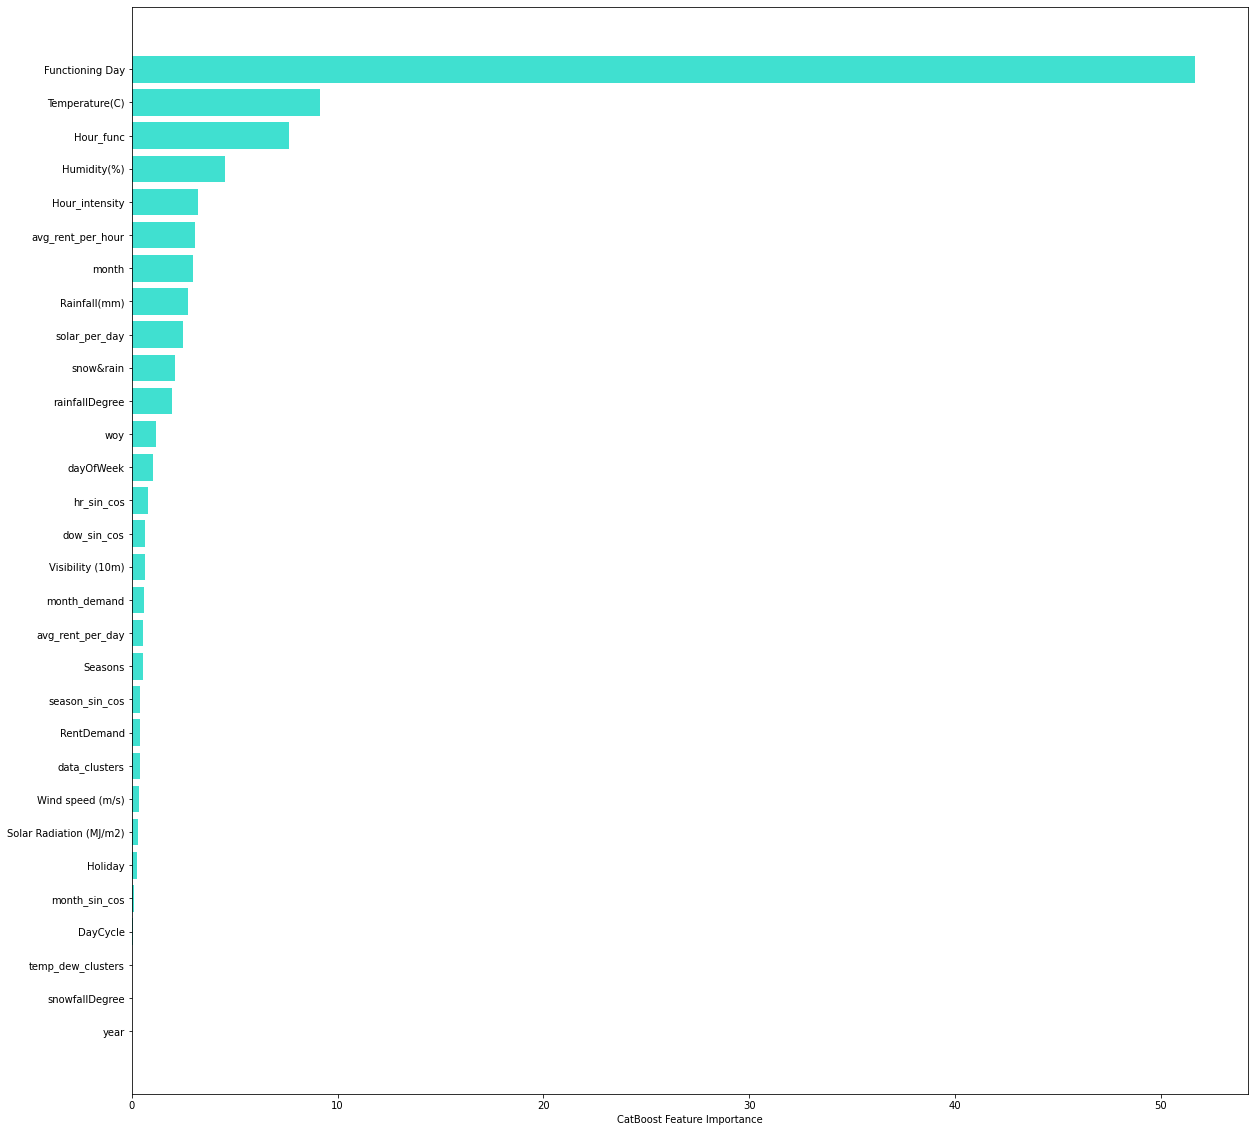

In [20]:
train_dataset = cb.Pool(X_train, y_train) 

model_cb = cb.CatBoostRegressor(loss_function='MAE', learning_rate=0.1, iterations=15000,depth=4,l2_leaf_reg=6)

model_cb.fit(train_dataset)

y_pred_cb = np.expm1(model_cb.predict(X_val)).round(0).astype(int)

for i in range(len(y_pred_cb)):
    if y_pred_cb[i] < 0:
        y_pred_cb[i] = 0
        
plt.figure(figsize=(20,20))
sorted_feature_importance = model_cb.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_feature_importance], 
        model_cb.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

print("Metrics of Catboost model: ")
print("val RMSLE CB model =", np.sqrt(mean_squared_log_error(y_val, y_pred_cb)))
print('val Root Mean Squared Error CB model:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_cb)))
print('val R2 Score CB model:',  r2_score(y_val, y_pred_cb))

**Taking average of the two models predictions as final prediction**

In [21]:
y_pred_val = (np.mean(np.array([y_pred_xgb, y_pred_cb]), axis=0)).round(0).astype(int)

In [22]:
RMSLE_val = np.sqrt(mean_squared_log_error(y_val,y_pred_val))
print("Val RMSLE=", RMSLE_val)
print('Val Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred_val)))
print('Val R2 Score:', r2_score(y_val, y_pred_val))
print("")

y_pred_train_xgb = np.expm1(model_xgb.predict(X_train)).round(0).astype(int)
y_pred_train_cb = np.expm1(model_cb.predict(X_train)).round(0).astype(int)
y_pred_train_final = (np.mean(np.array([y_pred_train_xgb, y_pred_train_cb]), axis=0)).round(0).astype(int)

for i in range(len(y_pred_train_final)):
    if y_pred_train_final[i] < 0:
        y_pred_train_final[i] = 0

y_train= np.expm1(y_train).round(0).astype(int)

RMSLE_train = np.sqrt(mean_squared_log_error(y_train, y_pred_train_final))
print("Train RMSLE=", RMSLE_train)
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train_final)))
print('Train R2 Score:',  r2_score(y_train, y_pred_train_final))

Val RMSLE= 0.14286949561490778
Val Root Mean Squared Error: 100.1943800475029
Val R2 Score: 0.9754454534764975

Train RMSLE= 0.20967617328636043
Train Root Mean Squared Error: 114.45084902308616
Train R2 Score: 0.9695024249762919


# Test

In [23]:
test_df = pd.read_csv('Dataset/test.csv')

test_df_prep = DataPrep(test_df)

# map the two final added features to the test data
test_df_prep['avg_rent_per_hour'] = test_df_prep['Hour'].map(avg_rent_per_hour['y'])
test_df_prep['avg_rent_per_hour']=np.log1p(test_df_prep['avg_rent_per_hour'])

test_df_prep['avg_rent_per_day'] = test_df_prep['dayOfWeek'].map(avg_rent_per_day['y'])
test_df_prep['avg_rent_per_day']=np.log1p(test_df_prep['avg_rent_per_day'])

test_df_prep = test_df_prep.drop(['Snowfall (cm)','Hour','Dew point temperature(C)',], axis='columns')

In [24]:
test_df_prep.head()

,ID,Date,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons,Holiday,...,Hour_func,month_demand,rainfallDegree,snowfallDegree,temp_dew_clusters,solar_per_day,snow&rain,data_clusters,avg_rent_per_hour,avg_rent_per_day
0,5760,2017-12-21,-1.3,4.510860,1.098612,0.003861,0.0,0.0,0,1,...,0,0,0,2,3,0.25625,0.0,0,6.251904,5.926926
1,5761,2017-12-21,-1.8,4.510860,0.955511,0.003802,0.0,0.0,0,1,...,1,0,0,2,3,0.25625,0.0,0,5.929589,5.926926
2,5762,2017-12-21,-2.2,4.488636,0.875469,0.002874,0.0,0.0,0,1,...,2,0,0,2,3,0.25625,0.0,0,5.533389,5.926926
3,5763,2017-12-21,-2.9,4.499810,0.832909,0.003472,0.0,0.0,0,1,...,3,0,0,2,3,0.25625,0.0,0,5.129899,5.926926
4,5764,2017-12-21,-3.6,4.521789,0.788457,0.004149,0.0,0.0,0,1,...,4,0,0,2,3,0.25625,0.0,0,4.718499,5.926926


In [25]:
X_test = test_df_prep.drop(columns=['ID','Date'])

y_test_predicted_xgb = np.expm1(model_xgb.predict(X_test)).round(0).astype(int)
y_test_predicted_cb = np.expm1(model_cb.predict(X_test)).round(0).astype(int)
y_test_predicted = (np.mean(np.array([y_test_predicted_xgb, y_test_predicted_cb]),axis=0)).round(0).astype(int)

for i in range(len(y_test_predicted)):
    if y_test_predicted[i] < 0:
        y_test_predicted[i] = 0
        
test_df_prep['y'] = y_test_predicted

In [26]:
actual_data = pd.read_csv('Dataset/test_with_y.csv')

y_actual = actual_data['Rented Bike Count']

RMSLE = np.sqrt(mean_squared_log_error(y_actual ,y_test_predicted))
print("RMSLE=", RMSLE)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_test_predicted)))
print('R2 Score:',  r2_score(y_actual, y_test_predicted))

RMSLE= 0.3657282226742384
Root Mean Squared Error: 173.05727857176845
R2 Score: 0.9232917923332179
